In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data : https://docs.google.com/spreadsheets/d/1F7HnuEWVaM1nvkfNYcJCoxQaaHLHxFn8/edit?usp=sharing&ouid=106153166383451073363&rtpof=true&sd=true

`import data`

In [2]:
#Data Harian
data = pd.read_excel("/content/DATA HARGA BARANG KEBUTUHAN POKOK KALTIM.xlsx",sheet_name='HARIAN')
data.head()

Tanggal  Beras Premium (Kg)  Beras Medium (Kg)  Gula Pasir (Kg)  \
0 2020-01-01               12900              11100            13000   
1 2020-01-02               12900              11100            13000   
2 2020-01-03               12800              11100            13000   
3 2020-01-04               12800              11100            13000   
4 2020-01-05               12800              11100            13000   

   Minyak Goreng Curah (Lt)  Minyak Goreng Kemasan Sederhana (Lt)  \
0                     11100                                 12400   
1                     11000                                 12400   
2                     11500                                 11000   
3                     11500                                 11000   
4                     11500                                 11000   

   Minyak Goreng Kemasan Premium (Lt)  Kedelai Impor (Kg)  Tepung Terigu (Kg)  \
0                               13700               10000               10700   
1                               13800               10000               10700   
2                               15000               10000                9700   
3                               15000               10000                9700   
4                               15000               10000                9700   

   Daging Sapi Paha Belakang (Kg)  Daging Ayam Ras (Kg)  Telur Ayam Ras (Kg)  \
0                          124200                 27600                28300   
1                          124200                 26700                28200   
2                          123300                 27300                26900   
3                          123300                 27300                26900   
4                          123300                 27300                26900   

   Cabe Merah Besar (Kg)  Cabe Merah  Keriting (Kg)  Cabe Rawit Merah (Kg)  \
0                  30400                      25000                  31700   
1                  32100                      26600                  29200   
2                  30800                      25800                  29200   
3                  30800                      25800                  29200   
4                  30800                      25800                  29200   

   Bawang Merah (Kg)  Bawang Putih Honan (Kg)  
0              32800                    31500  
1              33100                    32000  
2              31200                    29000  
3              31200                    29000  
4              31200                    29000

`cek tipe data, bentuk data`

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Tanggal                               815 non-null    datetime64[ns]
 1   Beras Premium (Kg)                    815 non-null    int64         
 2   Beras Medium (Kg)                     815 non-null    int64         
 3   Gula Pasir (Kg)                       815 non-null    int64         
 4   Minyak Goreng Curah (Lt)              815 non-null    int64         
 5   Minyak Goreng Kemasan Sederhana (Lt)  815 non-null    int64         
 6   Minyak Goreng Kemasan Premium (Lt)    815 non-null    int64         
 7   Kedelai Impor (Kg)                    815 non-null    int64         
 8   Tepung Terigu (Kg)                    815 non-null    int64         
 9   Daging Sapi Paha Belakang (Kg)        815 non-null    int64         
 10  Da

`cek missing value`

In [4]:
data.isnull().sum()

Tanggal                                 0
Beras Premium (Kg)                      0
Beras Medium (Kg)                       0
Gula Pasir (Kg)                         0
Minyak Goreng Curah (Lt)                0
Minyak Goreng Kemasan Sederhana (Lt)    0
Minyak Goreng Kemasan Premium (Lt)      0
Kedelai Impor (Kg)                      0
Tepung Terigu (Kg)                      0
Daging Sapi Paha Belakang (Kg)          0
Daging Ayam Ras (Kg)                    0
Telur Ayam Ras (Kg)                     0
Cabe Merah Besar (Kg)                   0
Cabe Merah  Keriting (Kg)               0
Cabe Rawit Merah (Kg)                   0
Bawang Merah (Kg)                       0
Bawang Putih Honan (Kg)                 0
dtype: int64

NB : *tidak terdapat missing value dalam data*

#EDA

`melihat pola data terhadap waktu`

In [5]:
#Pengelompokan Jenis
Beras = ['Beras Premium (Kg)', 'Beras Medium (Kg)']
Minyak = ['Minyak Goreng Curah (Lt)', 'Minyak Goreng Kemasan Sederhana (Lt)', 'Minyak Goreng Kemasan Premium (Lt)']
Daging = ['Daging Sapi Paha Belakang (Kg)', 'Daging Ayam Ras (Kg)']
AyamRas = ['Daging Ayam Ras (Kg)', 'Telur Ayam Ras (Kg)']
Cabe = ['Cabe Merah Besar (Kg)', 'Cabe Merah  Keriting (Kg)', 'Cabe Rawit Merah (Kg)']
Bawang = ['Bawang Merah (Kg)', 'Bawang Putih Honan (Kg)']

#List Jenis
Kategori = [Beras,Minyak,Daging,AyamRas,Cabe,Bawang]

NB : *yang dipakai hanya data harian* (sudah mewakili mingguan, bulanan)

In [6]:
df = data.copy()
df.index = pd.to_datetime(df['Tanggal'])
df.drop('Tanggal',axis=1,inplace = True)

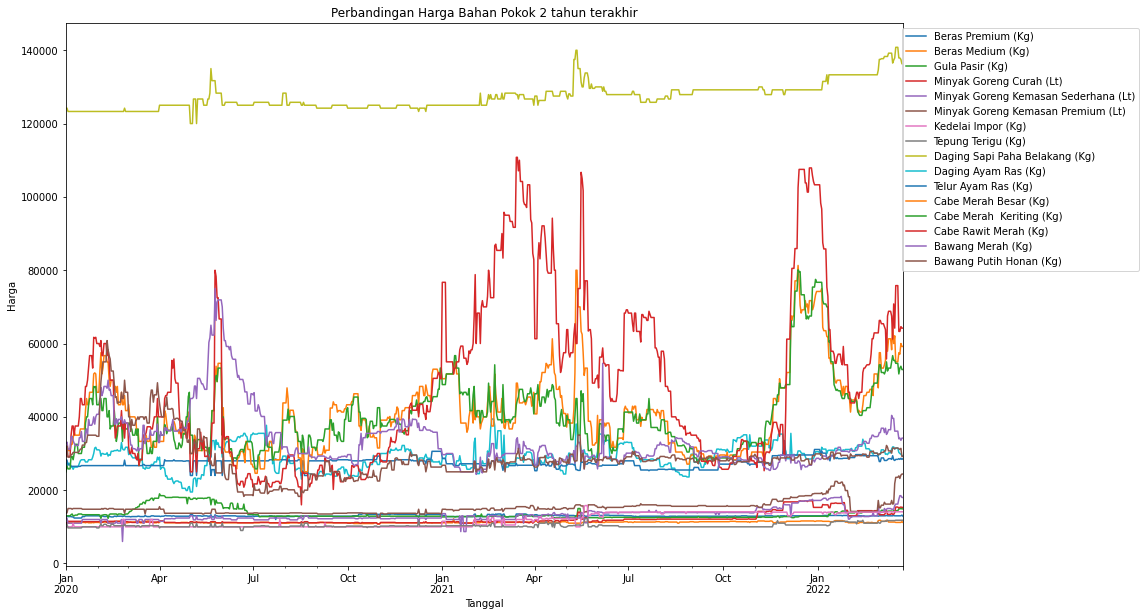

In [7]:
df.plot(kind='line', figsize=(15, 10))
plt.legend(loc='upper center',bbox_to_anchor=(1.14, 1))
plt.title('Perbandingan Harga Bahan Pokok 2 tahun terakhir')
plt.ylabel('Harga')
plt.xlabel('Tanggal')
plt.show() 

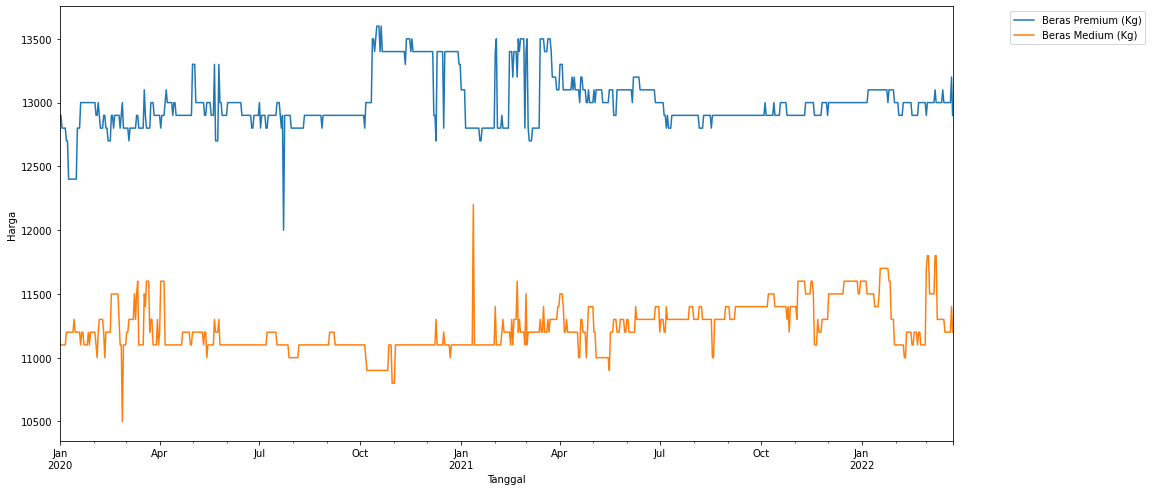

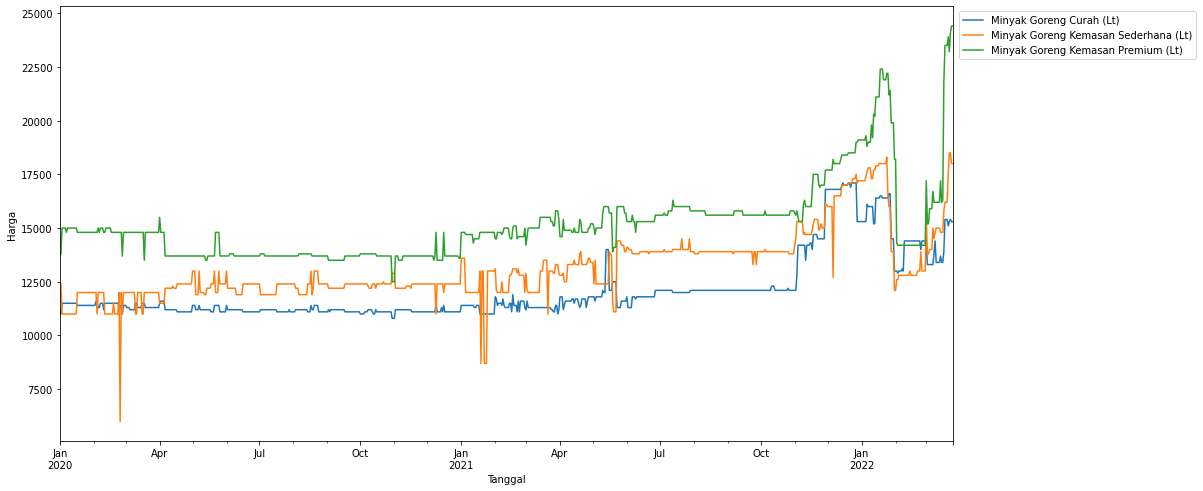

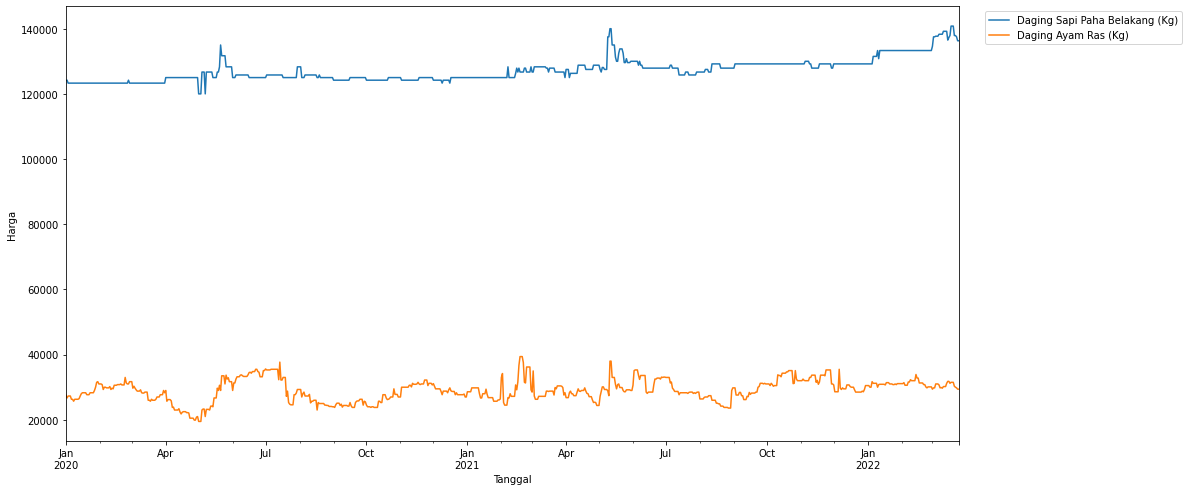

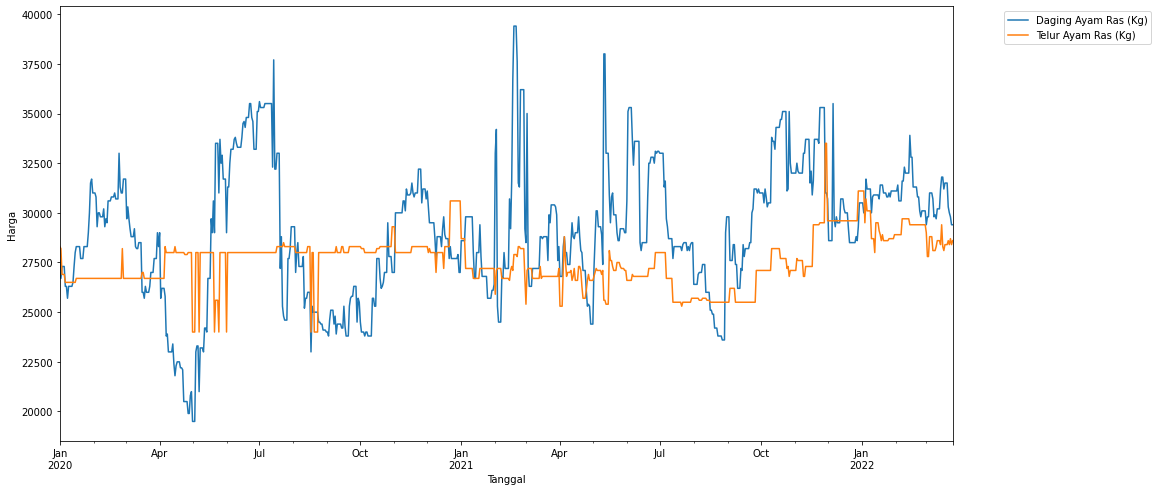

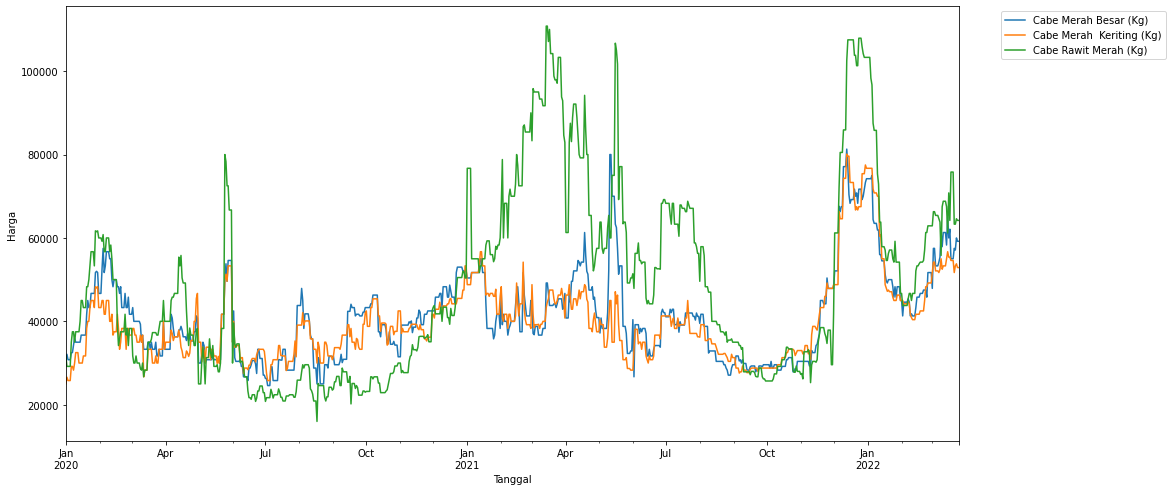

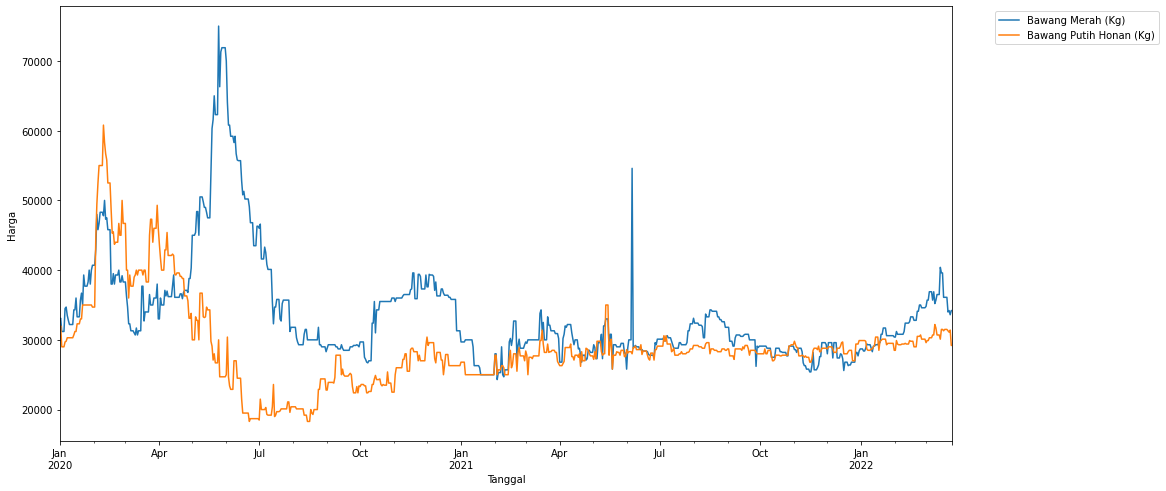

In [8]:
for i in Kategori:
  dataset = df[i]
  dataset.plot(kind='line', figsize=(16, 8))
  plt.legend(loc='upper center',bbox_to_anchor=(1.14, 1))
  plt.ylabel('Harga')
  plt.xlabel('Tanggal')
  plt.show() 

`Selisih kenaikan harga bahan pokok` dari `2020-01-01` sampai `2022-03-25`

In [9]:
desc = df.describe().loc[['mean','min','max']].T.reset_index()
tgl = df.loc[['20200101','20220325'],:].T.reset_index()
diff = df.loc[['20200101','20220325'],:].diff().loc['20220325',:].reset_index(drop=True)
diff = pd.DataFrame(list(zip(diff.values.tolist())),columns =['Selisih'])

#gabungkan data statistik deskriptif
stat_deskriptif = pd.concat([desc,tgl,diff],axis=1)
stat_deskriptif = stat_deskriptif.T.drop_duplicates().T

#ubah nama variabel
old_var = stat_deskriptif.columns
new_var = ['Bahan Pokok', 'mean', 'min', 'max', '2020/01/01', '2022/03/25', 'Selisih']
stat_deskriptif.rename(columns=dict(zip(old_var, new_var)), inplace=True)

#tambahkan persentase selisih
stat_deskriptif['Persentase Selisih (%)'] = stat_deskriptif['Selisih']/stat_deskriptif['2020/01/01']*100
stat_deskriptif

Bahan Pokok           mean       min       max  \
0                     Beras Premium (Kg)   12998.895706   12000.0   13600.0   
1                      Beras Medium (Kg)   11232.515337   10500.0   12200.0   
2                        Gula Pasir (Kg)   13514.478528   12300.0   19000.0   
3               Minyak Goreng Curah (Lt)   12107.607362   10800.0   17100.0   
4   Minyak Goreng Kemasan Sederhana (Lt)    13158.03681    6000.0   18500.0   
5     Minyak Goreng Kemasan Premium (Lt)   15150.429448   12500.0   24400.0   
6                     Kedelai Impor (Kg)   11762.453988   10000.0   15800.0   
7                     Tepung Terigu (Kg)   10300.245399    9000.0   12300.0   
8         Daging Sapi Paha Belakang (Kg)  127244.294479  120000.0  140800.0   
9                   Daging Ayam Ras (Kg)   29100.245399   19500.0   39400.0   
10                   Telur Ayam Ras (Kg)    27558.03681   24000.0   33500.0   
11                 Cabe Merah Besar (Kg)   41277.668712   24600.0   81300.0   
12             Cabe Merah  Keriting (Kg)   40067.116564   25000.0   80100.0   
13                 Cabe Rawit Merah (Kg)   48594.846626   16000.0  110800.0   
14                     Bawang Merah (Kg)   33673.128834   24300.0   75000.0   
15               Bawang Putih Honan (Kg)   28979.018405   18300.0   60800.0   

   2020/01/01 2022/03/25  Selisih Persentase Selisih (%)  
0       12900      12900      0.0                    0.0  
1       11100      11200    100.0               0.900901  
2       13000      14900   1900.0              14.615385  
3       11100      15300   4200.0              37.837838  
4       12400      18000   5600.0               45.16129  
5       13700      24400  10700.0               78.10219  
6       10000      14100   4100.0                   41.0  
7       10700      11800   1100.0              10.280374  
8      124200     136300  12100.0               9.742351  
9       27600      29400   1800.0               6.521739  
10      28300      28600    300.0               1.060071  
11      30400      59200  28800.0              94.736842  
12      25000      52900  27900.0                  111.6  
13      31700      64200  32500.0             102.523659  
14      32800      34200   1400.0               4.268293  
15      31500      29200  -2300.0              -7.301587

`cek autokorelasi`

NB : *tidak menjadi asumsi utama karena tidak terdapat variabel Y dalam data*

In [10]:
def autokorelasi(data):
  col = data.drop('Tanggal',axis=1).columns
  frame = []
  for i in col:
    nilai = data[i].autocorr()
    frame.append(nilai)
    print('variabel {} memiliki autokorelasi sebesar {}'.format(i,nilai))
    if nilai > 0:
      print('autokorelasi positif, mengikuti tren')
    else:
      None
    print('') 
  print('')
  return pd.DataFrame(frame).plot(kind='line',title='Visualisasi Nilai Autokorelasi Data')

**data harian**

variabel Beras Premium (Kg) memiliki autokorelasi sebesar 0.8468087235764579
autokorelasi positif, mengikuti tren

variabel Beras Medium (Kg) memiliki autokorelasi sebesar 0.8244859211376012
autokorelasi positif, mengikuti tren

variabel Gula Pasir (Kg) memiliki autokorelasi sebesar 0.9834342898605137
autokorelasi positif, mengikuti tren

variabel Minyak Goreng Curah (Lt) memiliki autokorelasi sebesar 0.987217500950847
autokorelasi positif, mengikuti tren

variabel Minyak Goreng Kemasan Sederhana (Lt) memiliki autokorelasi sebesar 0.929642542886126
autokorelasi positif, mengikuti tren

variabel Minyak Goreng Kemasan Premium (Lt) memiliki autokorelasi sebesar 0.9775070303232135
autokorelasi positif, mengikuti tren

variabel Kedelai Impor (Kg) memiliki autokorelasi sebesar 0.9808036096526532
autokorelasi positif, mengikuti tren

variabel Tepung Terigu (Kg) memiliki autokorelasi sebesar 0.8548671626398894
autokorelasi positif, mengikuti tren

variabel Daging Sapi Paha Belakang (Kg) memili

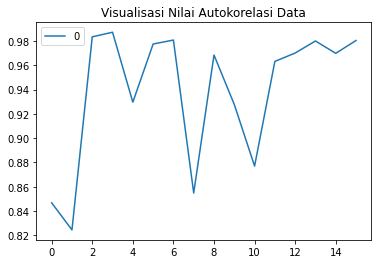

In [11]:
autokorelasi(data)

NB : *semua bahan pokok dalam data harian,mengikuti trend*

`cek korelasi`

**data harian**

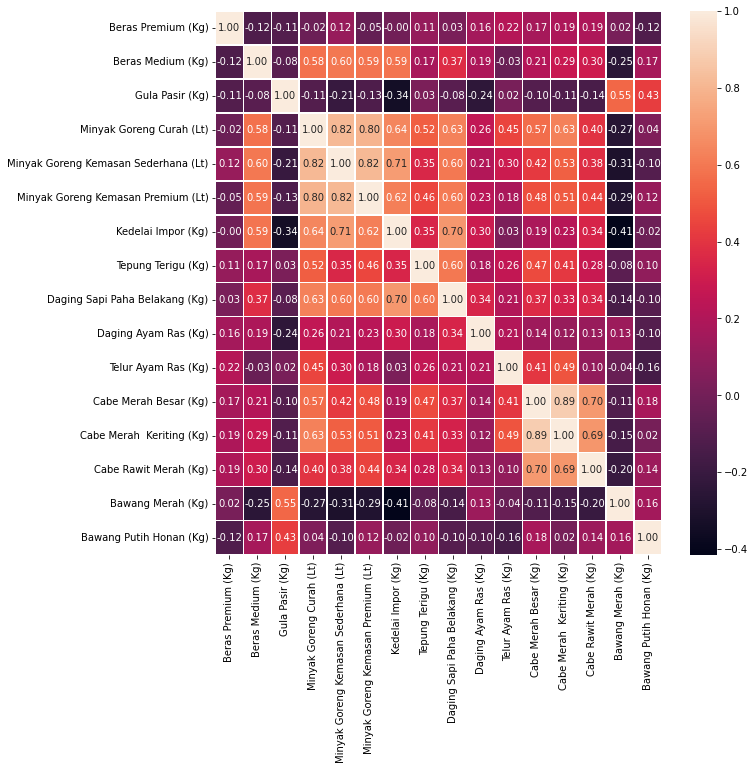

In [12]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

`cek stasioner`

In [13]:
def test_stasioner(timeseries):
  stasioner = []
  nonstasioner = []
  for i in timeseries.columns:
    print("Hasil dickey fuller variabel {}".format(i))
    adft = adfuller(timeseries[i],autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    
    for key,values in adft[4].items():
        output['Nilai Kritis (%s)'%key] =  values
    print(output)
    print('')

    if output['p-value'] < 0.05:
      stasioner.append(i)
    else:
      nonstasioner.append(i)
  print('Stasioner = ',stasioner)
  print('Tidak Stasioner = ',nonstasioner)

#apply fungsi test_stasioner  
test_stasioner(df)

Hasil dickey fuller variabel Beras Premium (Kg)
Test Statistics                 -4.244921
p-value                          0.000553
No. of lags used                14.000000
Number of observations used    800.000000
Nilai Kritis (1%)               -3.438551
Nilai Kritis (5%)               -2.865160
Nilai Kritis (10%)              -2.568697
dtype: float64

Hasil dickey fuller variabel Beras Medium (Kg)
Test Statistics                 -4.437837
p-value                          0.000254
No. of lags used                 6.000000
Number of observations used    808.000000
Nilai Kritis (1%)               -3.438469
Nilai Kritis (5%)               -2.865124
Nilai Kritis (10%)              -2.568678
dtype: float64

Hasil dickey fuller variabel Gula Pasir (Kg)
Test Statistics                 -2.078205
p-value                          0.253368
No. of lags used                18.000000
Number of observations used    796.000000
Nilai Kritis (1%)               -3.438592
Nilai Kritis (5%)             

NB : *terbukti lebih banyak variabel data memiliki tren / tidak stasioner*

`maka Model ARMA, ARIMA, SARIMA tidak direkomendasikan`

Maka akan dilihat `pola trend, musiman bahan pokok dari data`

In [14]:
for i in df.columns:
  dataset = df[i]
  cycle, trend = sm.tsa.filters.hpfilter(dataset, 12)
  fig, ax = plt.subplots(1,3,figsize=(33,8))
  ax[0].plot(dataset)
  ax[0].set_title('Harga Bahan Pokok {}'.format(i))
  ax[1].plot(trend)
  ax[1].set_title('Trend Harga Bahan Pokok {}'.format(i))
  ax[2].plot(cycle)
  ax[2].set_title('Siklus Harga Bahan Pokok {}'.format(i))
  print('\n \n')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

#Data Preprocessing

`Train Test Split`

In [15]:
train_data, test_data = df[0 : int(len(df) * 0.8)], df[int(len(df) * 0.8) :]

In [16]:
print('bentuk data train = ',train_data.shape)
print('bentuk data test = ',test_data.shape)

bentuk data train =  (652, 16)
bentuk data test =  (163, 16)


#Model ETS

`asumsi : `

Pola Musiman - Ya (multiplicative)

Pola Trend - Ya (multiplicative)

In [17]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

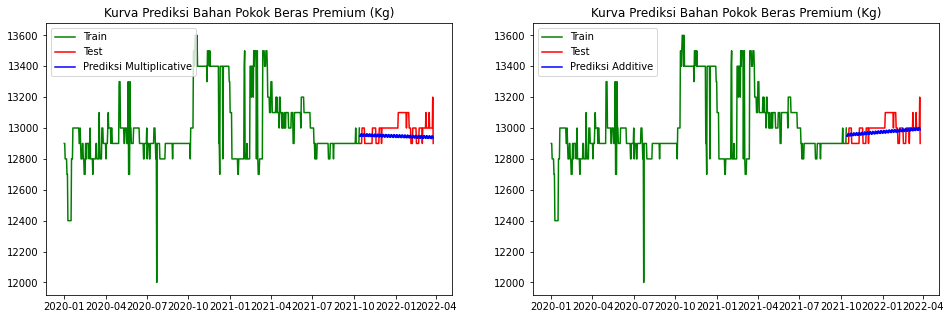

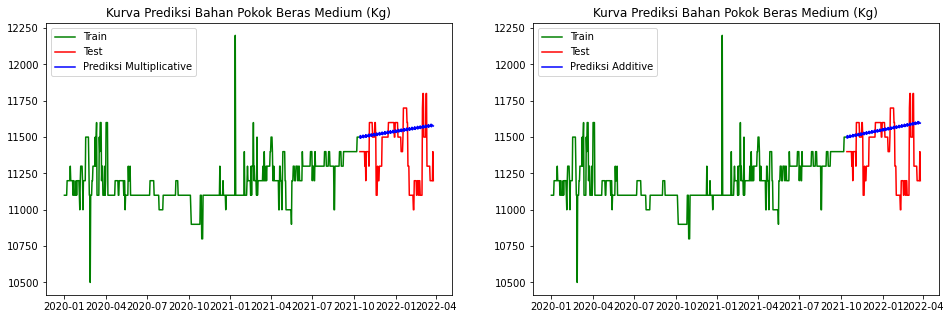

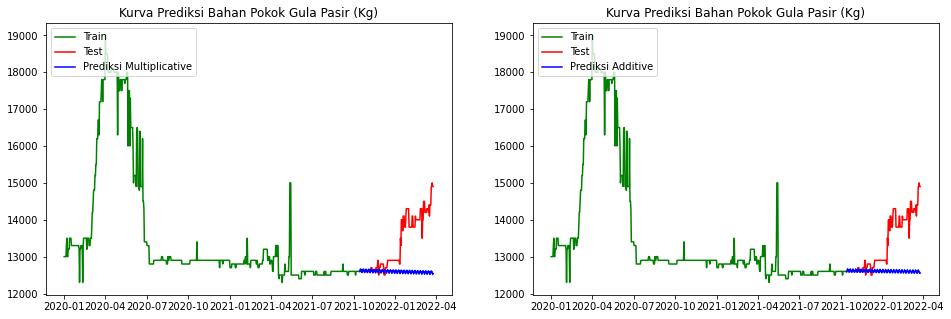

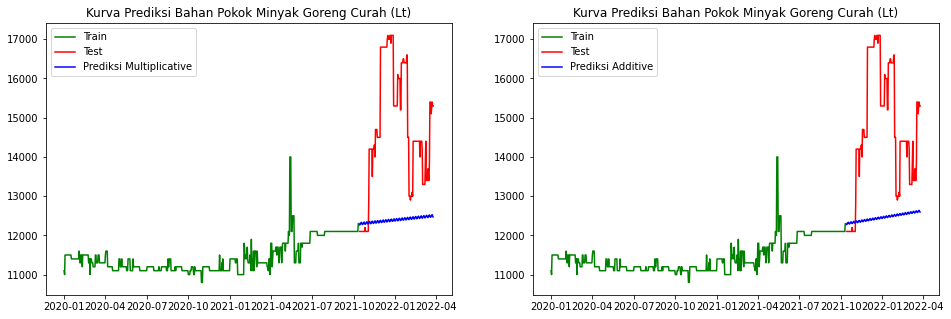

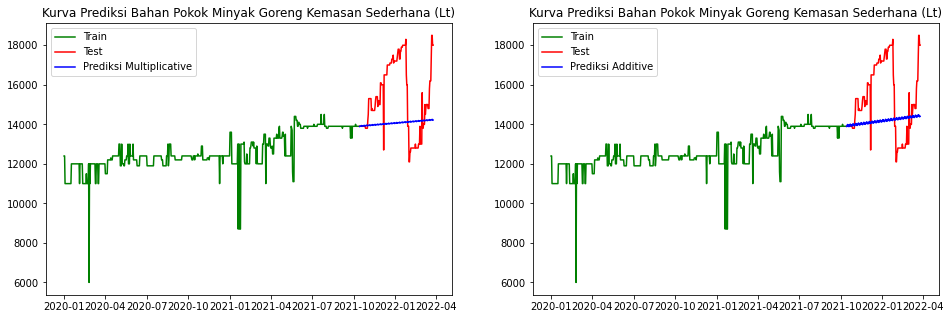

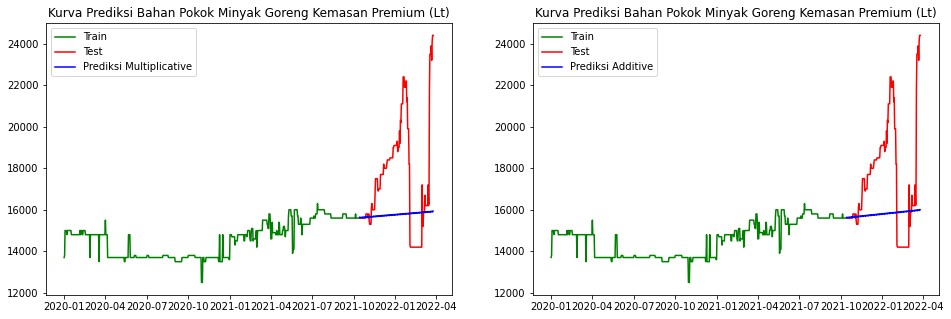

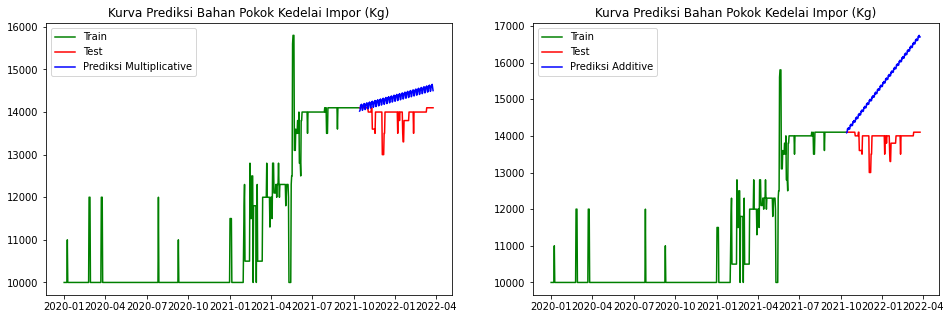

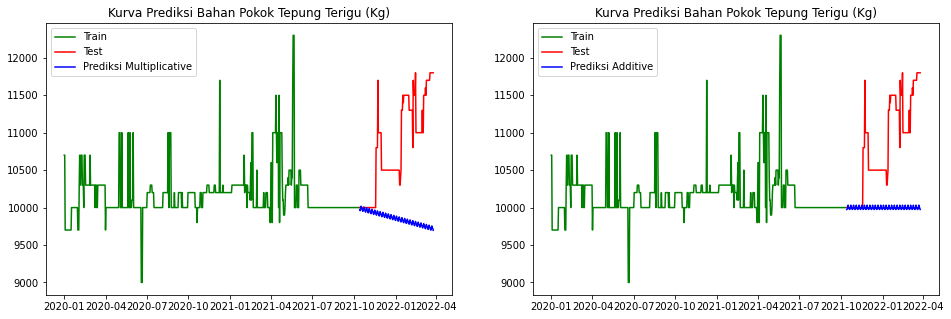

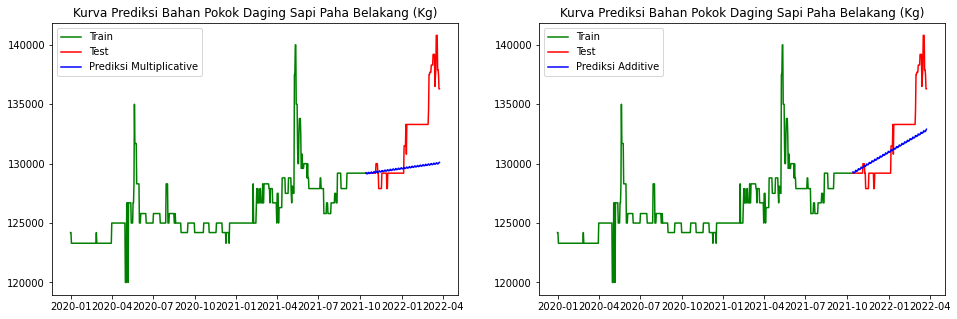

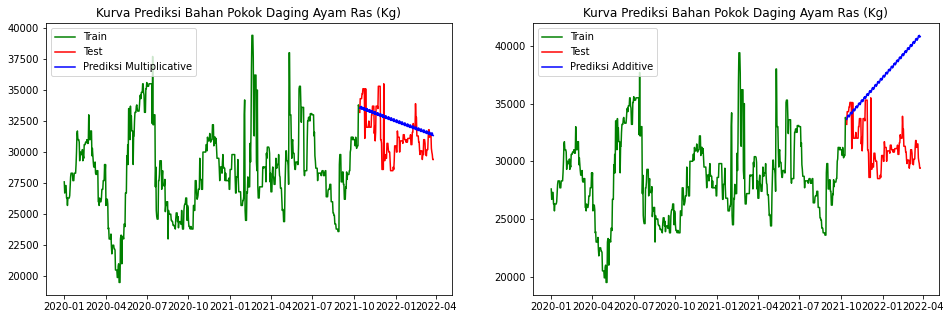

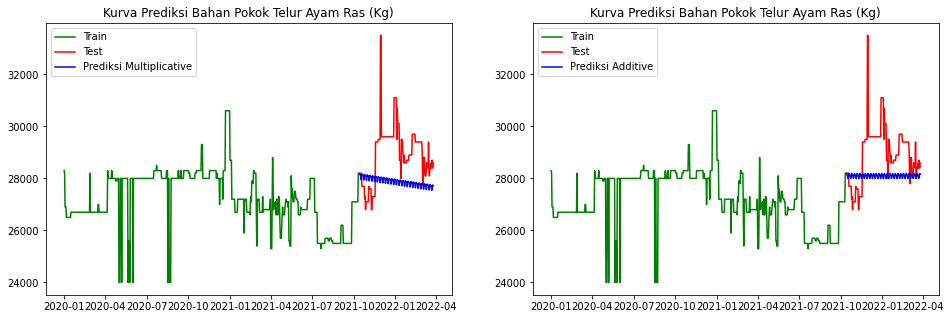

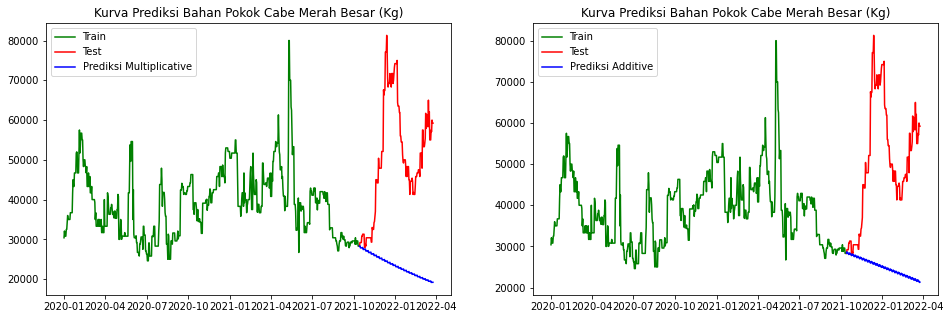

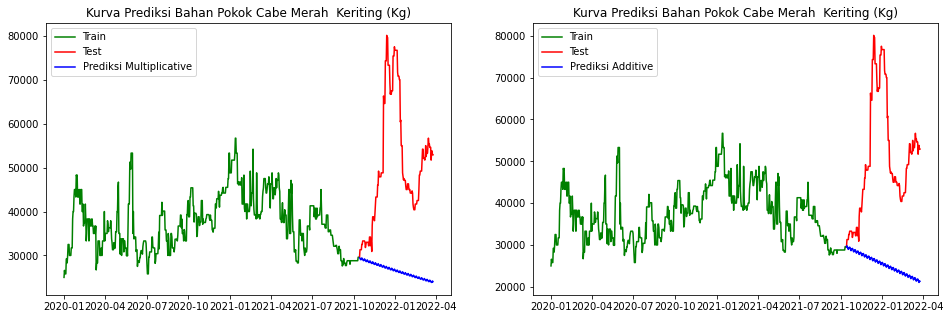

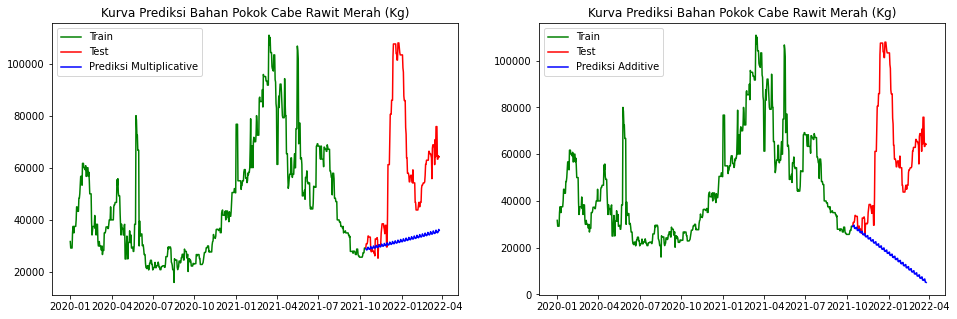

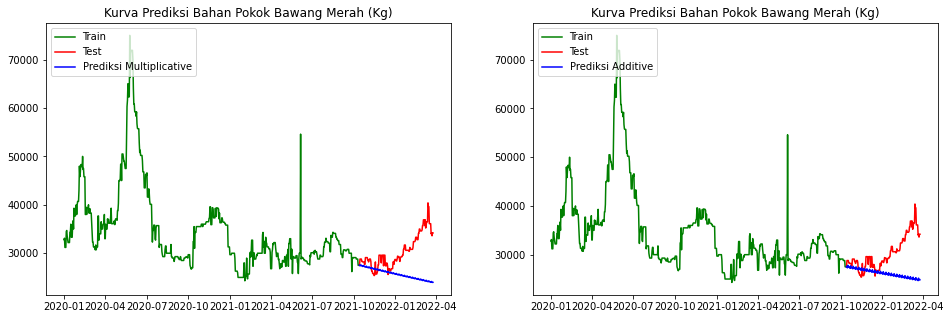

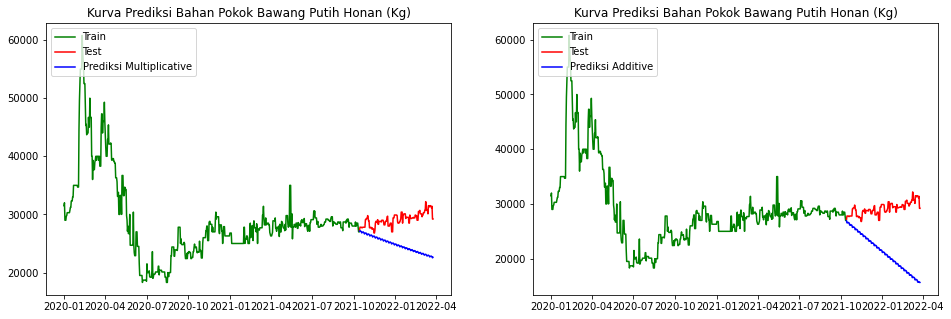

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

col = train_data.columns
MAPE_mul = []
MAPE_add = []
for i in col:
  hwmodel_mul = ExponentialSmoothing(train_data[i],trend='mul', seasonal='mul', seasonal_periods=6).fit()
  test_pred_mul = hwmodel_mul.forecast(test_data.shape[0])

  hwmodel_add = ExponentialSmoothing(train_data[i],trend='add', seasonal='add', seasonal_periods=6).fit()
  test_pred_add = hwmodel_add.forecast(test_data.shape[0])

  MAPE_mul.append(mape(test_data[i], test_pred_mul))
  MAPE_add.append(mape(test_data[i], test_pred_add))

  plt.figure(figsize=(16, 5))

  ax = plt.subplot(121)
  plt.plot(train_data.index, train_data[i], color='g', label='Train')
  plt.plot(test_data.index, test_data[i], color='r', label='Test')
  plt.plot(test_data.index, test_pred_mul, color='b', label='Prediksi Multiplicative')
  plt.legend(loc="upper left")
  plt.title("Kurva Prediksi Bahan Pokok {}".format(i))

  ax = plt.subplot(122)
  plt.plot(train_data.index, train_data[i], color='g', label='Train')
  plt.plot(test_data.index, test_data[i], color='r', label='Test')
  plt.plot(test_data.index, test_pred_add, color='b', label='Prediksi Additive')
  plt.legend(loc="upper left")
  plt.title("Kurva Prediksi Bahan Pokok {}".format(i))

`evaluasi model ETS`

In [19]:
ETS = pd.DataFrame(list(zip(col, MAPE_mul, MAPE_add)),columns =['Jenis Bahan Pokok', 'MAPE Multiplicative', 'MAPE Additive'])
print('rata-rata MAPE Multiplicative = ',ETS['MAPE Multiplicative'].mean())
print('rata-rata MAPE Additive = ',ETS['MAPE Additive'].mean())
ETS

rata-rata MAPE Multiplicative =  14.212894782266465
rata-rata MAPE Additive =  17.538456146660845


Jenis Bahan Pokok  MAPE Multiplicative  MAPE Additive
0                     Beras Premium (Kg)             0.524557       0.383941
1                      Beras Medium (Kg)             1.670888       1.714929
2                        Gula Pasir (Kg)             5.494329       5.423866
3               Minyak Goreng Curah (Lt)            15.212030      14.812341
4   Minyak Goreng Kemasan Sederhana (Lt)            10.908818      10.781089
5     Minyak Goreng Kemasan Premium (Lt)            12.008732      11.956002
6                     Kedelai Impor (Kg)             2.922598      10.680908
7                     Tepung Terigu (Kg)             8.600350       7.333747
8         Daging Sapi Paha Belakang (Kg)             1.881143       1.405268
9                   Daging Ayam Ras (Kg)             5.190743      19.835226
10                   Telur Ayam Ras (Kg)             4.403091       3.771958
11                 Cabe Merah Besar (Kg)            48.608171      45.495234
12             Cabe Merah  Keriting (Kg)            43.256321      45.419728
13                 Cabe Rawit Merah (Kg)            37.566108      61.452155
14                     Bawang Merah (Kg)            14.501706      13.230696
15               Bawang Putih Honan (Kg)            14.656733      26.918210

#Model ETS parameter (alpha,beta,gamma)

In [20]:
#HoltWinter dengan parameter alpha,beta,gamma tanpa pola musiman

col = train_data.columns
BahanPokok = []
MAPE_mul = []
MAPE_add = []
a = []
b = []
c = []

for alpha in np.arange(0.1, 1, 0.1):
   for beta in np.arange(0.1, 1, 0.1):
     for gamma in np.arange(0.1, 1, 0.1):
      for i in col:
        #dict1 = {}
        BahanPokok.append(i)
        a.append(alpha)
        b.append(beta)
        c.append(gamma)
        hwmodel_mul = ExponentialSmoothing(train_data[i],trend='mul', seasonal_periods=6).fit(smoothing_level=alpha, smoothing_slope=beta, damping_slope =gamma, optimized=False)
        test_pred_mul= hwmodel_mul.forecast(test_data.shape[0])

        hwmodel_add = ExponentialSmoothing(train_data[i],trend='add', seasonal_periods=6).fit(smoothing_level=alpha, smoothing_slope=beta, damping_slope =gamma, optimized=False)
        test_pred_add = hwmodel_add.forecast(test_data.shape[0])

        MAPE_mul.append(mape(test_data[i], test_pred_mul))
        MAPE_add.append(mape(test_data[i], test_pred_add))

ETS_param = pd.DataFrame(list(zip(BahanPokok, a, b, c, MAPE_mul, MAPE_add)),columns =['Bahan Pokok', 'alpha', 'beta', 'Gamma', 'MAPE Multiplicative', 'MAPE Additive'])

Output streaming akan dipotong hingga 5000 baris terakhir.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.


`evaluasi model ETS parameter (alpha,beta,gamma)`

In [21]:
output = []

for i in col:
  dict1 = {}
  df_i = ETS_param[ETS_param['Bahan Pokok'] == i]
  df_i = df_i.sort_values(by=['MAPE Multiplicative', 'MAPE Additive'], ascending=True)
  dict1.update(df_i.iloc[0,:])
  output.append(dict1)

ETS_new = pd.DataFrame(output)
print('rata-rata MAPE Multiplicative = ',ETS_new['MAPE Multiplicative'].mean())
print('rata-rata MAPE Additive= ',ETS_new['MAPE Additive'].mean())
ETS_new

rata-rata MAPE Multiplicative =  8.937066995950492
rata-rata MAPE Additive=  10.115986339730497


Bahan Pokok  alpha  beta  Gamma  \
0                     Beras Premium (Kg)    0.1   0.1    0.1   
1                      Beras Medium (Kg)    0.8   0.8    0.1   
2                        Gula Pasir (Kg)    0.2   0.6    0.1   
3               Minyak Goreng Curah (Lt)    0.9   0.7    0.1   
4   Minyak Goreng Kemasan Sederhana (Lt)    0.2   0.2    0.1   
5     Minyak Goreng Kemasan Premium (Lt)    0.1   0.4    0.1   
6                     Kedelai Impor (Kg)    0.1   0.1    0.1   
7                     Tepung Terigu (Kg)    0.1   0.9    0.1   
8         Daging Sapi Paha Belakang (Kg)    0.1   0.9    0.1   
9                   Daging Ayam Ras (Kg)    0.1   0.6    0.1   
10                   Telur Ayam Ras (Kg)    0.1   0.5    0.1   
11                 Cabe Merah Besar (Kg)    0.1   0.3    0.1   
12             Cabe Merah  Keriting (Kg)    0.8   0.2    0.1   
13                 Cabe Rawit Merah (Kg)    0.9   0.7    0.1   
14                     Bawang Merah (Kg)    0.1   0.6    0.1   
15               Bawang Putih Honan (Kg)    0.1   0.6    0.1   

    MAPE Multiplicative  MAPE Additive  
0              0.423659       0.422434  
1              1.395416       1.394799  
2              2.479127       2.586260  
3             10.081554      10.149597  
4             10.552530      10.547715  
5             11.705841      11.689613  
6              0.996675       0.993585  
7              7.155098       7.148969  
8              1.108861       1.122038  
9              6.914985      19.249326  
10             2.945244       4.038429  
11            32.911795      31.692315  
12            17.519234      19.745241  
13            21.435009      25.832679  
14             6.809539       6.813723  
15             8.558504       8.429057

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

Text(0.5, 1.0, 'Kurva Prediksi Bahan Pokok Tepung Terigu (Kg)')

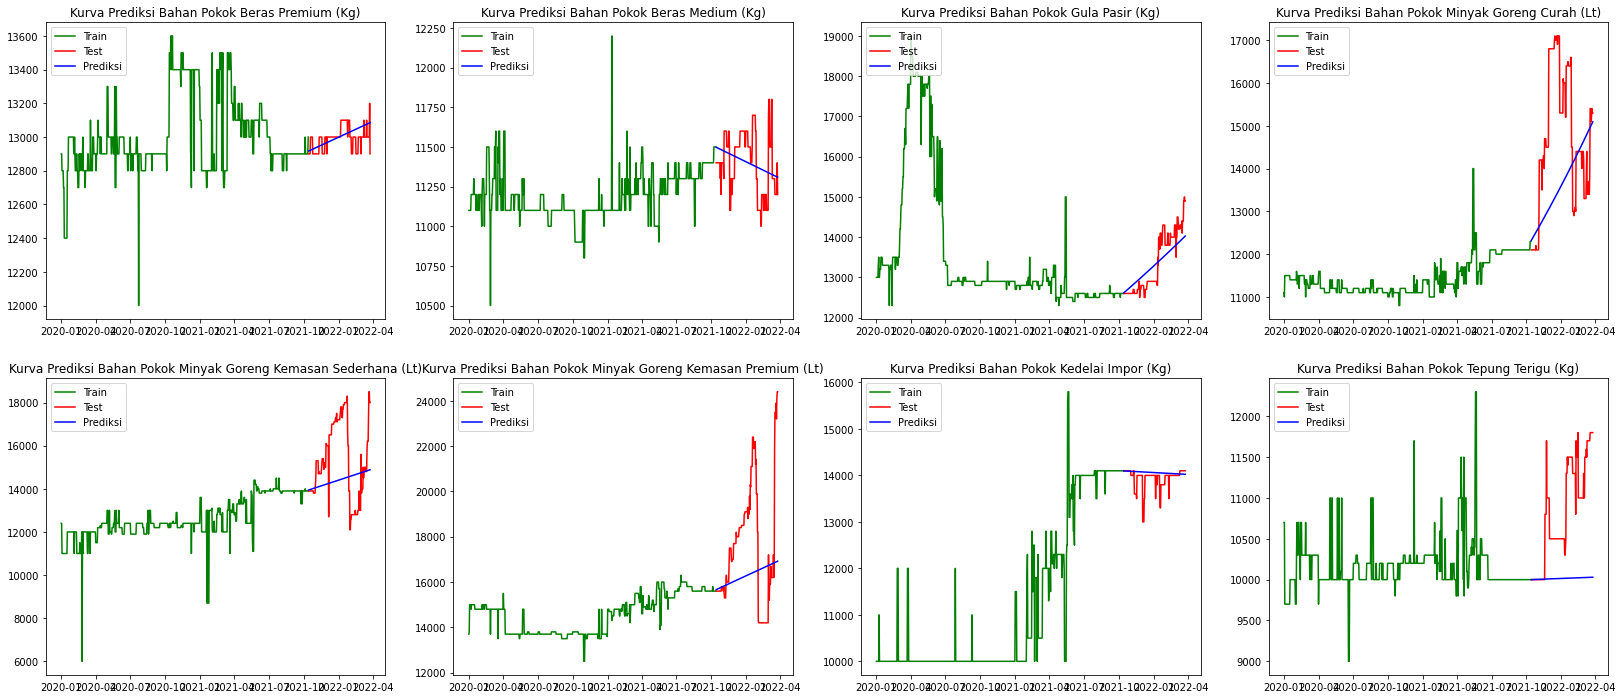

In [22]:
plt.figure(figsize=(28,12))

ax = plt.subplot(241)
hwmodel = ExponentialSmoothing(train_data['Beras Premium (Kg)'],trend='add', seasonal_periods=6).fit(smoothing_level=0.1, smoothing_slope=0.1, damping_slope =0.1, optimized=False)
test_pred= hwmodel.forecast(test_data.shape[0])
plt.plot(train_data.index, train_data['Beras Premium (Kg)'], color='g', label='Train')
plt.plot(test_data.index, test_data['Beras Premium (Kg)'], color='r', label='Test')
plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Bahan Pokok {}".format('Beras Premium (Kg)'))

ax = plt.subplot(242)
hwmodel = ExponentialSmoothing(train_data['Beras Medium (Kg)'],trend='add', seasonal_periods=6).fit(smoothing_level=0.8, smoothing_slope=0.8, damping_slope =0.6, optimized=False)
test_pred= hwmodel.forecast(test_data.shape[0])
plt.plot(train_data.index, train_data['Beras Medium (Kg)'], color='g', label='Train')
plt.plot(test_data.index, test_data['Beras Medium (Kg)'], color='r', label='Test')
plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Bahan Pokok {}".format('Beras Medium (Kg)'))

ax = plt.subplot(243)
hwmodel = ExponentialSmoothing(train_data['Gula Pasir (Kg)'],trend='mul', seasonal_periods=6).fit(smoothing_level=0.2, smoothing_slope=0.6, damping_slope =0.4, optimized=False)
test_pred= hwmodel.forecast(test_data.shape[0])
plt.plot(train_data.index, train_data['Gula Pasir (Kg)'], color='g', label='Train')
plt.plot(test_data.index, test_data['Gula Pasir (Kg)'], color='r', label='Test')
plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Bahan Pokok {}".format('Gula Pasir (Kg)'))

ax = plt.subplot(244)
hwmodel = ExponentialSmoothing(train_data['Minyak Goreng Curah (Lt)'],trend='mul', seasonal_periods=6).fit(smoothing_level=0.9, smoothing_slope=0.7, damping_slope =0.9, optimized=False)
test_pred= hwmodel.forecast(test_data.shape[0])
plt.plot(train_data.index, train_data['Minyak Goreng Curah (Lt)'], color='g', label='Train')
plt.plot(test_data.index, test_data['Minyak Goreng Curah (Lt)'], color='r', label='Test')
plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Bahan Pokok {}".format('Minyak Goreng Curah (Lt)'))

ax = plt.subplot(245)
hwmodel = ExponentialSmoothing(train_data['Minyak Goreng Kemasan Sederhana (Lt)'],trend='add', seasonal_periods=6).fit(smoothing_level=0.2, smoothing_slope=0.2, damping_slope =0.9, optimized=False)
test_pred= hwmodel.forecast(test_data.shape[0])
plt.plot(train_data.index, train_data['Minyak Goreng Kemasan Sederhana (Lt)'], color='g', label='Train')
plt.plot(test_data.index, test_data['Minyak Goreng Kemasan Sederhana (Lt)'], color='r', label='Test')
plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Bahan Pokok {}".format('Minyak Goreng Kemasan Sederhana (Lt)'))

ax = plt.subplot(246)
hwmodel = ExponentialSmoothing(train_data['Minyak Goreng Kemasan Premium (Lt)'],trend='add', seasonal_periods=6).fit(smoothing_level=0.1, smoothing_slope=0.4, damping_slope =0.9, optimized=False)
test_pred= hwmodel.forecast(test_data.shape[0])
plt.plot(train_data.index, train_data['Minyak Goreng Kemasan Premium (Lt)'], color='g', label='Train')
plt.plot(test_data.index, test_data['Minyak Goreng Kemasan Premium (Lt)'], color='r', label='Test')
plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Bahan Pokok {}".format('Minyak Goreng Kemasan Premium (Lt)'))

ax = plt.subplot(247)
hwmodel = ExponentialSmoothing(train_data['Kedelai Impor (Kg)'],trend='add', seasonal_periods=6).fit(smoothing_level=0.1, smoothing_slope=0.1, damping_slope =0.1, optimized=False)
test_pred= hwmodel.forecast(test_data.shape[0])
plt.plot(train_data.index, train_data['Kedelai Impor (Kg)'], color='g', label='Train')
plt.plot(test_data.index, test_data['Kedelai Impor (Kg)'], color='r', label='Test')
plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Bahan Pokok {}".format('Kedelai Impor (Kg)'))

ax = plt.subplot(248)
hwmodel = ExponentialSmoothing(train_data['Tepung Terigu (Kg)'],trend='add', seasonal_periods=6).fit(smoothing_level=0.1, smoothing_slope=0.9, damping_slope =0.8, optimized=False)
test_pred= hwmodel.forecast(test_data.shape[0])
plt.plot(train_data.index, train_data['Tepung Terigu (Kg)'], color='g', label='Train')
plt.plot(test_data.index, test_data['Tepung Terigu (Kg)'], color='r', label='Test')
plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Bahan Pokok {}".format('Tepung Terigu (Kg)'))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

Text(0.5, 1.0, 'Kurva Prediksi Bahan Pokok Bawang Putih Honan (Kg)')

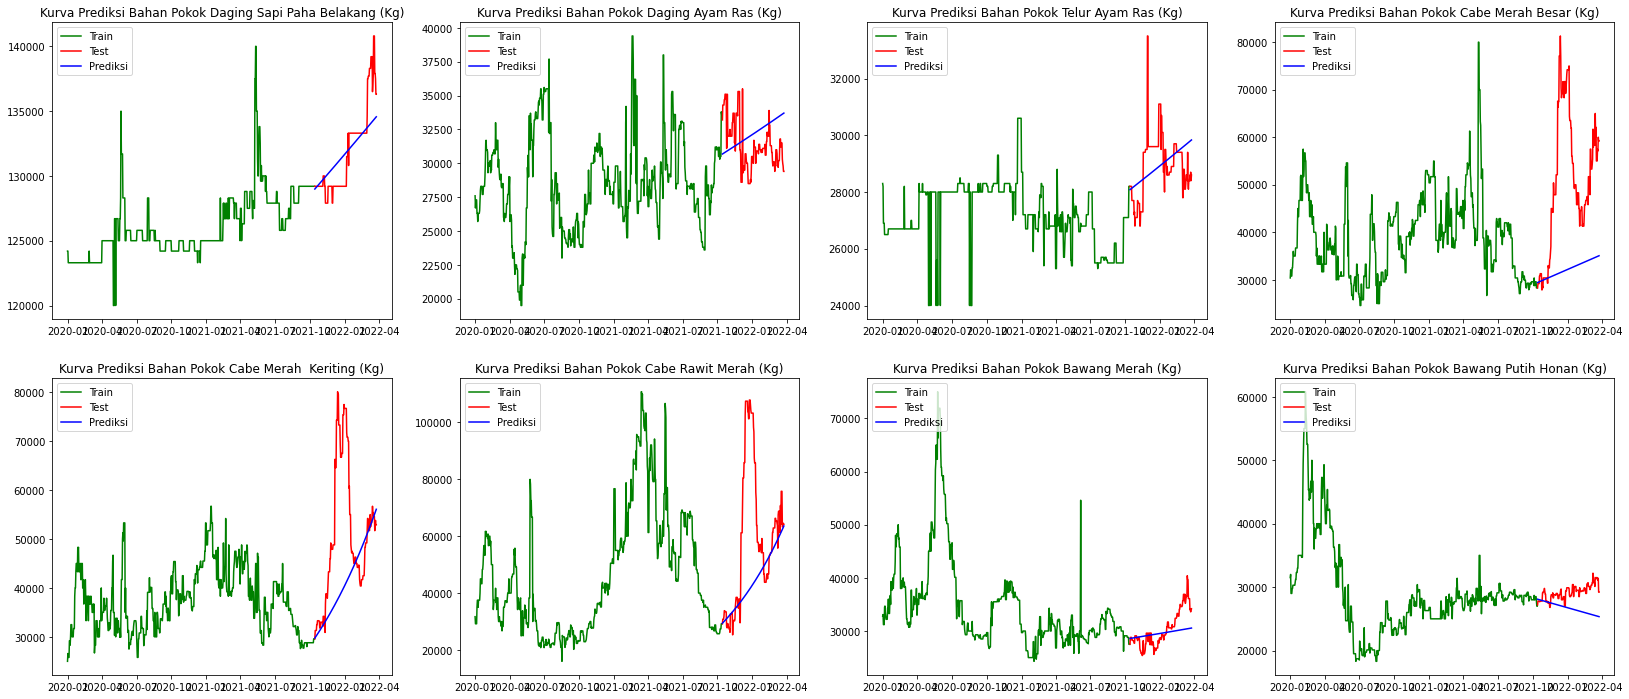

In [23]:
plt.figure(figsize=(28,12))

ax = plt.subplot(241)
hwmodel = ExponentialSmoothing(train_data['Daging Sapi Paha Belakang (Kg)'],trend='mul', seasonal_periods=6).fit(smoothing_level=0.1, smoothing_slope=0.9, damping_slope =0.8, optimized=False)
test_pred= hwmodel.forecast(test_data.shape[0])
plt.plot(train_data.index, train_data['Daging Sapi Paha Belakang (Kg)'], color='g', label='Train')
plt.plot(test_data.index, test_data['Daging Sapi Paha Belakang (Kg)'], color='r', label='Test')
plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Bahan Pokok {}".format('Daging Sapi Paha Belakang (Kg)'))

ax = plt.subplot(242)
hwmodel = ExponentialSmoothing(train_data['Daging Ayam Ras (Kg)'],trend='mul', seasonal_periods=6).fit(smoothing_level=0.1, smoothing_slope=0.6, damping_slope =0.9, optimized=False)
test_pred= hwmodel.forecast(test_data.shape[0])
plt.plot(train_data.index, train_data['Daging Ayam Ras (Kg)'], color='g', label='Train')
plt.plot(test_data.index, test_data['Daging Ayam Ras (Kg)'], color='r', label='Test')
plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Bahan Pokok {}".format('Daging Ayam Ras (Kg)'))

ax = plt.subplot(243)
hwmodel = ExponentialSmoothing(train_data['Telur Ayam Ras (Kg)'],trend='mul', seasonal_periods=6).fit(smoothing_level=0.1, smoothing_slope=0.5, damping_slope =0.9, optimized=False)
test_pred= hwmodel.forecast(test_data.shape[0])
plt.plot(train_data.index, train_data['Telur Ayam Ras (Kg)'], color='g', label='Train')
plt.plot(test_data.index, test_data['Telur Ayam Ras (Kg)'], color='r', label='Test')
plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Bahan Pokok {}".format('Telur Ayam Ras (Kg)'))

ax = plt.subplot(244)
hwmodel = ExponentialSmoothing(train_data['Cabe Merah Besar (Kg)'],trend='add', seasonal_periods=6).fit(smoothing_level=0.1, smoothing_slope=0.3, damping_slope =0.1, optimized=False)
test_pred= hwmodel.forecast(test_data.shape[0])
plt.plot(train_data.index, train_data['Cabe Merah Besar (Kg)'], color='g', label='Train')
plt.plot(test_data.index, test_data['Cabe Merah Besar (Kg)'], color='r', label='Test')
plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Bahan Pokok {}".format('Cabe Merah Besar (Kg)'))

ax = plt.subplot(245)
hwmodel = ExponentialSmoothing(train_data['Cabe Merah  Keriting (Kg)'],trend='mul', seasonal_periods=6).fit(smoothing_level=0.8, smoothing_slope=0.2, damping_slope =0.9, optimized=False)
test_pred= hwmodel.forecast(test_data.shape[0])
plt.plot(train_data.index, train_data['Cabe Merah  Keriting (Kg)'], color='g', label='Train')
plt.plot(test_data.index, test_data['Cabe Merah  Keriting (Kg)'], color='r', label='Test')
plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Bahan Pokok {}".format('Cabe Merah  Keriting (Kg)'))

ax = plt.subplot(246)
hwmodel = ExponentialSmoothing(train_data['Cabe Rawit Merah (Kg)'],trend='mul', seasonal_periods=6).fit(smoothing_level=0.9, smoothing_slope=0.7, damping_slope =0.1, optimized=False)
test_pred= hwmodel.forecast(test_data.shape[0])
plt.plot(train_data.index, train_data['Cabe Rawit Merah (Kg)'], color='g', label='Train')
plt.plot(test_data.index, test_data['Cabe Rawit Merah (Kg)'], color='r', label='Test')
plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Bahan Pokok {}".format('Cabe Rawit Merah (Kg)'))

ax = plt.subplot(247)
hwmodel = ExponentialSmoothing(train_data['Bawang Merah (Kg)'],trend='mul', seasonal_periods=6).fit(smoothing_level=0.1, smoothing_slope=0.6, damping_slope =0.8, optimized=False)
test_pred= hwmodel.forecast(test_data.shape[0])
plt.plot(train_data.index, train_data['Bawang Merah (Kg)'], color='g', label='Train')
plt.plot(test_data.index, test_data['Bawang Merah (Kg)'], color='r', label='Test')
plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Bahan Pokok {}".format('Bawang Merah (Kg)'))

ax = plt.subplot(248)
hwmodel = ExponentialSmoothing(train_data['Bawang Putih Honan (Kg)'],trend='add', seasonal_periods=6).fit(smoothing_level=0.1, smoothing_slope=0.6, damping_slope =0.4, optimized=False)
test_pred= hwmodel.forecast(test_data.shape[0])
plt.plot(train_data.index, train_data['Bawang Putih Honan (Kg)'], color='g', label='Train')
plt.plot(test_data.index, test_data['Bawang Putih Honan (Kg)'], color='r', label='Test')
plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
plt.legend(loc="upper left")
plt.title("Kurva Prediksi Bahan Pokok {}".format('Bawang Putih Honan (Kg)'))

#Model LSTM

In [24]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [25]:
#deskripsi bentuk data train,test
def ekstrak_window_data(dataset, window_len=5, zero_base=True):
    window_data = []
    for i in range(len(dataset) - window_len):
        tmp = dataset[i: (i + window_len)].copy()
        window_data.append(tmp.values)
    return np.array(window_data)

#membentuk data baru kriteria LSTM
def prepare_data(dataset, aim, window_len=10, zero_base=True, test_size=0.2):
    X_train = ekstrak_window_data(train_data, window_len, zero_base)
    X_test = ekstrak_window_data(test_data, window_len, zero_base)
    y_train = train_data[aim][window_len:].values
    y_test = test_data[aim][window_len:].values
    if zero_base:
        y_train = y_train / train_data[aim][:-window_len].values - 1
        y_test = y_test / test_data[aim][:-window_len].values - 1
    return train_data, test_data, X_train, X_test, y_train, y_test

#membangun model LSTM
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(10,16)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse',optimizer = optimizer, metrics=['accuracy'])
    return grid_model

In [ ]:
#parameter tuning
aim = df.columns
window_len = 10
test_size = 0.2
zero_base = True
loss = 'mse'
dropout = 0.2

#run model LSTM
output = []
for i in aim:
  dict1 = {}
  train_data, test_data, X_train, X_test, y_train, y_test = prepare_data(
                                                            df, aim = i, window_len=window_len, zero_base=zero_base, test_size=test_size)
  
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(X_test,y_test))
  parameters = {'batch_size' : [16,32],
              'epochs' : [100,50],
              'optimizer' : ['adam'] }
  grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters, cv = 2)
  grid_search = grid_search.fit(X_train,y_train)
  dict1.update(grid_search.best_params_)
  output.append(dict1)

param = pd.DataFrame(output)
param

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Epoch 1/50
21/21 [==============================] - 5s 83ms/step - loss: 0.0174 - accuracy: 0.4984 - val_loss: 0.0040 - val_accuracy: 0.5752
Epoch 2/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0087 - accuracy: 0.4984 - val_loss: 0.0012 - val_accuracy: 0.5752
Epoch 3/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0044 - accuracy: 0.4984 - val_loss: 9.5050e-04 - val_accuracy: 0.5752
Epoch 4/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0031 - accuracy: 0.4984 - val_loss: 1.7426e-04 - val_accuracy: 0.5752
Epoch 5/50
21/21 [==============================] - 0s 16ms/step - loss: 0.0028 - accuracy: 0.4984 - val_loss: 3.3278e-04 - val_accuracy: 0.5752
Epoch 6/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0018 - accuracy: 0.4984 - val_loss: 2.4674e-04 - val_accuracy: 0.5752
Epoch 7/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0014 - accuracy: 0.4984 - val_loss: 3.2121e-04 - val_accuracy: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Epoch 1/50
21/21 [==============================] - 6s 76ms/step - loss: 0.0207 - accuracy: 0.5296 - val_loss: 0.0043 - val_accuracy: 0.2092
Epoch 2/50
21/21 [==============================] - 0s 19ms/step - loss: 0.0113 - accuracy: 0.5296 - val_loss: 0.0017 - val_accuracy: 0.2092
Epoch 3/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0071 - accuracy: 0.5296 - val_loss: 0.0049 - val_accuracy: 0.2092
Epoch 4/50
21/21 [==============================] - 0s 19ms/step - loss: 0.0077 - accuracy: 0.5296 - val_loss: 0.0026 - val_accuracy: 0.2092
Epoch 5/50
21/21 [==============================] - 0s 23ms/step - loss: 0.0041 - accuracy: 0.5296 - val_loss: 0.0029 - val_accuracy: 0.2092
Epoch 6/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0031 - accuracy: 0.5296 - val_loss: 0.0011 - val_accuracy: 0.2092
Epoch 7/50
21/21 [==============================] - 0s 16ms/step - loss: 0.0028 - accuracy: 0.5296 - val_loss: 0.0011 - val_accuracy: 0.2092
Epoch 8/50
21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Epoch 1/50
21/21 [==============================] - 6s 60ms/step - loss: 0.0432 - accuracy: 0.4766 - val_loss: 0.0081 - val_accuracy: 0.3333
Epoch 2/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0133 - accuracy: 0.4829 - val_loss: 0.0036 - val_accuracy: 0.3333
Epoch 3/50
21/21 [==============================] - 0s 16ms/step - loss: 0.0086 - accuracy: 0.4829 - val_loss: 0.0018 - val_accuracy: 0.3333
Epoch 4/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0060 - accuracy: 0.4829 - val_loss: 0.0015 - val_accuracy: 0.3333
Epoch 5/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0053 - accuracy: 0.4829 - val_loss: 0.0014 - val_accuracy: 0.3333
Epoch 6/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0049 - accuracy: 0.4829 - val_loss: 0.0012 - val_accuracy: 0.3333
Epoch 7/50
21/21 [==============================] - 0s 16ms/step - loss: 0.0032 - accuracy: 0.4829 - val_loss: 0.0011 - val_accuracy: 0.3333
Epoch 8/50
21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Epoch 1/50
21/21 [==============================] - 5s 59ms/step - loss: 0.0240 - accuracy: 0.4673 - val_loss: 0.0110 - val_accuracy: 0.1830
Epoch 2/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0131 - accuracy: 0.4673 - val_loss: 0.0101 - val_accuracy: 0.1830
Epoch 3/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0088 - accuracy: 0.4673 - val_loss: 0.0101 - val_accuracy: 0.1830
Epoch 4/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0079 - accuracy: 0.4673 - val_loss: 0.0084 - val_accuracy: 0.1830
Epoch 5/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0047 - accuracy: 0.4673 - val_loss: 0.0092 - val_accuracy: 0.1830
Epoch 6/50
21/21 [==============================] - 0s 16ms/step - loss: 0.0042 - accuracy: 0.4673 - val_loss: 0.0080 - val_accuracy: 0.1830
Epoch 7/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0044 - accuracy: 0.4673 - val_loss: 0.0087 - val_accuracy: 0.1830
Epoch 8/50
21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Epoch 1/50
21/21 [==============================] - 5s 59ms/step - loss: 0.0519 - accuracy: 0.4174 - val_loss: 0.0123 - val_accuracy: 0.0588
Epoch 2/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0234 - accuracy: 0.4206 - val_loss: 0.0124 - val_accuracy: 0.0588
Epoch 3/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0189 - accuracy: 0.4206 - val_loss: 0.0109 - val_accuracy: 0.0588
Epoch 4/50
21/21 [==============================] - 0s 16ms/step - loss: 0.0152 - accuracy: 0.4206 - val_loss: 0.0111 - val_accuracy: 0.0588
Epoch 5/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0151 - accuracy: 0.4206 - val_loss: 0.0120 - val_accuracy: 0.0588
Epoch 6/50
21/21 [==============================] - 0s 17ms/step - loss: 0.0116 - accuracy: 0.4206 - val_loss: 0.0097 - val_accuracy: 0.0588
Epoch 7/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0098 - accuracy: 0.4206 - val_loss: 0.0103 - val_accuracy: 0.0588
Epoch 8/50
21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Epoch 1/50
21/21 [==============================] - 5s 55ms/step - loss: 0.0280 - accuracy: 0.3022 - val_loss: 0.0395 - val_accuracy: 0.1438
Epoch 2/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0168 - accuracy: 0.3022 - val_loss: 0.0327 - val_accuracy: 0.1438
Epoch 3/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0120 - accuracy: 0.3022 - val_loss: 0.0235 - val_accuracy: 0.1438
Epoch 4/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0080 - accuracy: 0.3022 - val_loss: 0.0248 - val_accuracy: 0.1438
Epoch 5/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0059 - accuracy: 0.3022 - val_loss: 0.0257 - val_accuracy: 0.1438
Epoch 6/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0048 - accuracy: 0.3022 - val_loss: 0.0273 - val_accuracy: 0.1438
Epoch 7/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0048 - accuracy: 0.3022 - val_loss: 0.0265 - val_accuracy: 0.1438
Epoch 8/50
21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Epoch 1/50
21/21 [==============================] - 5s 54ms/step - loss: 0.0248 - accuracy: 0.5670 - val_loss: 0.0065 - val_accuracy: 0.5294
Epoch 2/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0169 - accuracy: 0.5670 - val_loss: 0.0109 - val_accuracy: 0.5294
Epoch 3/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0194 - accuracy: 0.5670 - val_loss: 0.0131 - val_accuracy: 0.5294
Epoch 4/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0166 - accuracy: 0.5670 - val_loss: 0.0147 - val_accuracy: 0.5294
Epoch 5/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0116 - accuracy: 0.5670 - val_loss: 0.0091 - val_accuracy: 0.5294
Epoch 6/50
21/21 [==============================] - 0s 13ms/step - loss: 0.0109 - accuracy: 0.5670 - val_loss: 0.0066 - val_accuracy: 0.5294
Epoch 7/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0088 - accuracy: 0.5670 - val_loss: 0.0075 - val_accuracy: 0.5294
Epoch 8/50
21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Epoch 1/50
21/21 [==============================] - 4s 53ms/step - loss: 0.0225 - accuracy: 0.5981 - val_loss: 0.0093 - val_accuracy: 0.4314
Epoch 2/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0119 - accuracy: 0.6012 - val_loss: 0.0043 - val_accuracy: 0.4314
Epoch 3/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0072 - accuracy: 0.6012 - val_loss: 0.0034 - val_accuracy: 0.4314
Epoch 4/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0063 - accuracy: 0.6012 - val_loss: 0.0042 - val_accuracy: 0.4314
Epoch 5/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0051 - accuracy: 0.6012 - val_loss: 0.0033 - val_accuracy: 0.4314
Epoch 6/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0043 - accuracy: 0.6012 - val_loss: 0.0033 - val_accuracy: 0.4314
Epoch 7/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0037 - accuracy: 0.6012 - val_loss: 0.0030 - val_accuracy: 0.4314
Epoch 8/50
21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Epoch 1/50
21/21 [==============================] - 5s 56ms/step - loss: 0.0300 - accuracy: 0.4174 - val_loss: 0.0072 - val_accuracy: 0.5882
Epoch 2/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0112 - accuracy: 0.4174 - val_loss: 0.0074 - val_accuracy: 0.5882
Epoch 3/50
21/21 [==============================] - 0s 14ms/step - loss: 0.0073 - accuracy: 0.4174 - val_loss: 0.0055 - val_accuracy: 0.5882
Epoch 4/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0050 - accuracy: 0.4174 - val_loss: 0.0030 - val_accuracy: 0.5882
Epoch 5/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0036 - accuracy: 0.4174 - val_loss: 0.0027 - val_accuracy: 0.5882
Epoch 6/50
21/21 [==============================] - 0s 15ms/step - loss: 0.0026 - accuracy: 0.4174 - val_loss: 0.0027 - val_accuracy: 0.5882
Epoch 7/50
21/21 [==============================] - 0s 16ms/step - loss: 0.0023 - accuracy: 0.4174 - val_loss: 0.0027 - val_accuracy: 0.5882
Epoch 8/50
21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Epoch 1/50
21/21 [==============================] - 6s 67ms/step - loss: 0.0586 - accuracy: 0.0093 - val_loss: 0.0119 - val_accuracy: 0.0196
Epoch 2/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0399 - accuracy: 0.0093 - val_loss: 0.0079 - val_accuracy: 0.0196
Epoch 3/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0269 - accuracy: 0.0093 - val_loss: 0.0044 - val_accuracy: 0.0196
Epoch 4/50
21/21 [==============================] - 0s 17ms/step - loss: 0.0218 - accuracy: 0.0093 - val_loss: 0.0046 - val_accuracy: 0.0196
Epoch 5/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0230 - accuracy: 0.0093 - val_loss: 0.0055 - val_accuracy: 0.0196
Epoch 6/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0239 - accuracy: 0.0093 - val_loss: 0.0049 - val_accuracy: 0.0196
Epoch 7/50
21/21 [==============================] - 0s 19ms/step - loss: 0.0202 - accuracy: 0.0093 - val_loss: 0.0050 - val_accuracy: 0.0196
Epoch 8/50
21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Epoch 1/50
21/21 [==============================] - 5s 61ms/step - loss: 0.0256 - accuracy: 0.2274 - val_loss: 0.0055 - val_accuracy: 0.1830
Epoch 2/50
21/21 [==============================] - 0s 17ms/step - loss: 0.0141 - accuracy: 0.2274 - val_loss: 0.0039 - val_accuracy: 0.1830
Epoch 3/50
21/21 [==============================] - 0s 17ms/step - loss: 0.0113 - accuracy: 0.2274 - val_loss: 0.0022 - val_accuracy: 0.1830
Epoch 4/50
21/21 [==============================] - 0s 17ms/step - loss: 0.0079 - accuracy: 0.2274 - val_loss: 0.0021 - val_accuracy: 0.1830
Epoch 5/50
21/21 [==============================] - 0s 16ms/step - loss: 0.0063 - accuracy: 0.2274 - val_loss: 0.0017 - val_accuracy: 0.1830
Epoch 6/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0043 - accuracy: 0.2274 - val_loss: 0.0015 - val_accuracy: 0.1830
Epoch 7/50
21/21 [==============================] - 0s 17ms/step - loss: 0.0043 - accuracy: 0.2274 - val_loss: 0.0021 - val_accuracy: 0.1830
Epoch 8/50
21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Epoch 1/50
21/21 [==============================] - 5s 62ms/step - loss: 0.0634 - accuracy: 0.0436 - val_loss: 0.0418 - val_accuracy: 0.0196
Epoch 2/50
21/21 [==============================] - 0s 17ms/step - loss: 0.0485 - accuracy: 0.0436 - val_loss: 0.0375 - val_accuracy: 0.0196
Epoch 3/50
21/21 [==============================] - 0s 20ms/step - loss: 0.0429 - accuracy: 0.0436 - val_loss: 0.0361 - val_accuracy: 0.0196
Epoch 4/50
21/21 [==============================] - 0s 23ms/step - loss: 0.0372 - accuracy: 0.0436 - val_loss: 0.0330 - val_accuracy: 0.0196
Epoch 5/50
21/21 [==============================] - 0s 21ms/step - loss: 0.0368 - accuracy: 0.0436 - val_loss: 0.0309 - val_accuracy: 0.0196
Epoch 6/50
21/21 [==============================] - 0s 24ms/step - loss: 0.0357 - accuracy: 0.0436 - val_loss: 0.0319 - val_accuracy: 0.0196
Epoch 7/50
21/21 [==============================] - 1s 25ms/step - loss: 0.0332 - accuracy: 0.0436 - val_loss: 0.0314 - val_accuracy: 0.0196
Epoch 8/50
21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Epoch 1/50
21/21 [==============================] - 5s 62ms/step - loss: 0.0349 - accuracy: 0.0654 - val_loss: 0.0345 - val_accuracy: 0.0131
Epoch 2/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0249 - accuracy: 0.0654 - val_loss: 0.0313 - val_accuracy: 0.0131
Epoch 3/50
21/21 [==============================] - 0s 19ms/step - loss: 0.0199 - accuracy: 0.0654 - val_loss: 0.0288 - val_accuracy: 0.0131
Epoch 4/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0188 - accuracy: 0.0654 - val_loss: 0.0286 - val_accuracy: 0.0131
Epoch 5/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0179 - accuracy: 0.0654 - val_loss: 0.0278 - val_accuracy: 0.0131
Epoch 6/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0161 - accuracy: 0.0654 - val_loss: 0.0282 - val_accuracy: 0.0131
Epoch 7/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0172 - accuracy: 0.0654 - val_loss: 0.0290 - val_accuracy: 0.0131
Epoch 8/50
21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Epoch 1/50
21/21 [==============================] - 6s 63ms/step - loss: 0.0932 - accuracy: 0.0312 - val_loss: 0.1329 - val_accuracy: 0.0065
Epoch 2/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0547 - accuracy: 0.0312 - val_loss: 0.1340 - val_accuracy: 0.0065
Epoch 3/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0467 - accuracy: 0.0312 - val_loss: 0.1305 - val_accuracy: 0.0065
Epoch 4/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0480 - accuracy: 0.0312 - val_loss: 0.1342 - val_accuracy: 0.0065
Epoch 5/50
21/21 [==============================] - 0s 19ms/step - loss: 0.0443 - accuracy: 0.0312 - val_loss: 0.1278 - val_accuracy: 0.0065
Epoch 6/50
21/21 [==============================] - 0s 17ms/step - loss: 0.0424 - accuracy: 0.0312 - val_loss: 0.1301 - val_accuracy: 0.0065
Epoch 7/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0387 - accuracy: 0.0312 - val_loss: 0.1332 - val_accuracy: 0.0065
Epoch 8/50
21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Epoch 1/50
21/21 [==============================] - 5s 62ms/step - loss: 0.0438 - accuracy: 0.0436 - val_loss: 0.0110 - val_accuracy: 0.0261
Epoch 2/50
21/21 [==============================] - 0s 17ms/step - loss: 0.0257 - accuracy: 0.0436 - val_loss: 0.0101 - val_accuracy: 0.0261
Epoch 3/50
21/21 [==============================] - 0s 16ms/step - loss: 0.0197 - accuracy: 0.0436 - val_loss: 0.0091 - val_accuracy: 0.0261
Epoch 4/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0147 - accuracy: 0.0436 - val_loss: 0.0075 - val_accuracy: 0.0261
Epoch 5/50
21/21 [==============================] - 0s 17ms/step - loss: 0.0136 - accuracy: 0.0436 - val_loss: 0.0123 - val_accuracy: 0.0261
Epoch 6/50
21/21 [==============================] - 0s 17ms/step - loss: 0.0150 - accuracy: 0.0436 - val_loss: 0.0092 - val_accuracy: 0.0261
Epoch 7/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0125 - accuracy: 0.0436 - val_loss: 0.0073 - val_accuracy: 0.0261
Epoch 8/50
21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Epoch 1/50
21/21 [==============================] - 5s 64ms/step - loss: 0.0675 - accuracy: 0.1153 - val_loss: 0.0064 - val_accuracy: 0.0458
Epoch 2/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0164 - accuracy: 0.1215 - val_loss: 0.0034 - val_accuracy: 0.0458
Epoch 3/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0116 - accuracy: 0.1215 - val_loss: 0.0051 - val_accuracy: 0.0458
Epoch 4/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0109 - accuracy: 0.1215 - val_loss: 0.0038 - val_accuracy: 0.0458
Epoch 5/50
21/21 [==============================] - 0s 20ms/step - loss: 0.0097 - accuracy: 0.1215 - val_loss: 0.0038 - val_accuracy: 0.0458
Epoch 6/50
21/21 [==============================] - 0s 19ms/step - loss: 0.0084 - accuracy: 0.1215 - val_loss: 0.0041 - val_accuracy: 0.0458
Epoch 7/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0078 - accuracy: 0.1215 - val_loss: 0.0045 - val_accuracy: 0.0458
Epoch 8/50
21

batch_size  epochs optimizer
0           16     100      adam
1           32      50      adam
2           16      50      adam
3           32      50      adam
4           32      50      adam
5           16      50      adam
6           16     100      adam
7           16      50      adam
8           16      50      adam
9           16      50      adam
10          16      50      adam
11          16      50      adam
12          16      50      adam
13          16      50      adam
14          16     100      adam
15          32     100      adam

In [26]:
def model_lstm(input_data, output_size, neurons, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

`data (df) tanpa scalling`

Epoch 1/100
41/41 [==============================] - 4s 27ms/step - loss: 0.2816 - accuracy: 0.3567 - val_loss: 0.0710 - val_accuracy: 0.5752
Epoch 2/100
41/41 [==============================] - 0s 7ms/step - loss: 0.1650 - accuracy: 0.4174 - val_loss: 0.0933 - val_accuracy: 0.5359
Epoch 3/100
41/41 [==============================] - 0s 7ms/step - loss: 0.1436 - accuracy: 0.4097 - val_loss: 0.0722 - val_accuracy: 0.4706
Epoch 4/100
41/41 [==============================] - 0s 7ms/step - loss: 0.1070 - accuracy: 0.4097 - val_loss: 0.0632 - val_accuracy: 0.5752
Epoch 5/100
41/41 [==============================] - 0s 7ms/step - loss: 0.0931 - accuracy: 0.4143 - val_loss: 0.0443 - val_accuracy: 0.5752
Epoch 6/100
41/41 [==============================] - 0s 7ms/step - loss: 0.0716 - accuracy: 0.4252 - val_loss: 0.0360 - val_accuracy: 0.5752
Epoch 7/100
41/41 [==============================] - 0s 7ms/step - loss: 0.0705 - accuracy: 0.4330 - val_loss: 0.0281 - val_accuracy: 0.5752
Epoch 8/100


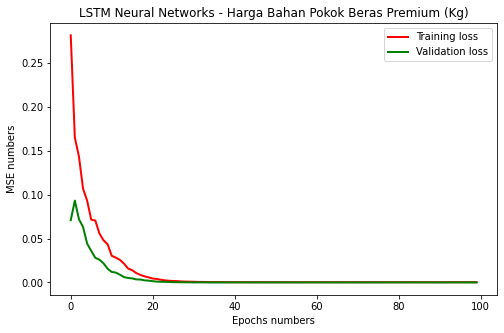

Epoch 1/100
41/41 [==============================] - 3s 20ms/step - loss: 0.3920 - accuracy: 0.3551 - val_loss: 0.0530 - val_accuracy: 0.2092
Epoch 2/100
41/41 [==============================] - 0s 7ms/step - loss: 0.2079 - accuracy: 0.4595 - val_loss: 0.0148 - val_accuracy: 0.2092
Epoch 3/100
41/41 [==============================] - 0s 7ms/step - loss: 0.1543 - accuracy: 0.4517 - val_loss: 0.0098 - val_accuracy: 0.2092
Epoch 4/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1358 - accuracy: 0.4626 - val_loss: 0.0101 - val_accuracy: 0.2092
Epoch 5/100
41/41 [==============================] - 0s 9ms/step - loss: 0.1172 - accuracy: 0.4657 - val_loss: 0.0072 - val_accuracy: 0.2092
Epoch 6/100
41/41 [==============================] - 0s 9ms/step - loss: 0.1038 - accuracy: 0.4595 - val_loss: 0.0087 - val_accuracy: 0.2092
Epoch 7/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0907 - accuracy: 0.4844 - val_loss: 0.0060 - val_accuracy: 0.2092
Epoch 8/100


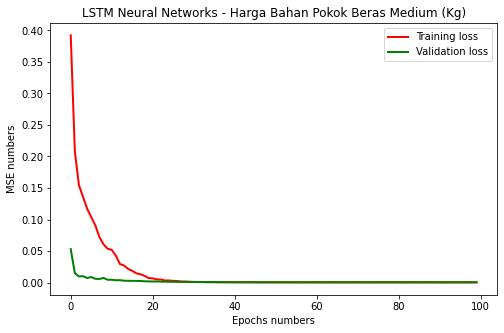

Epoch 1/100
41/41 [==============================] - 3s 20ms/step - loss: 0.0760 - accuracy: 0.3894 - val_loss: 0.0169 - val_accuracy: 0.3333
Epoch 2/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0538 - accuracy: 0.4003 - val_loss: 0.0297 - val_accuracy: 0.3333
Epoch 3/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0455 - accuracy: 0.4003 - val_loss: 0.0272 - val_accuracy: 0.3333
Epoch 4/100
41/41 [==============================] - 0s 7ms/step - loss: 0.0299 - accuracy: 0.4050 - val_loss: 0.0212 - val_accuracy: 0.3333
Epoch 5/100
41/41 [==============================] - 0s 7ms/step - loss: 0.0259 - accuracy: 0.4065 - val_loss: 0.0201 - val_accuracy: 0.3333
Epoch 6/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0198 - accuracy: 0.4065 - val_loss: 0.0186 - val_accuracy: 0.3333
Epoch 7/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0152 - accuracy: 0.4065 - val_loss: 0.0153 - val_accuracy: 0.3333
Epoch 8/100


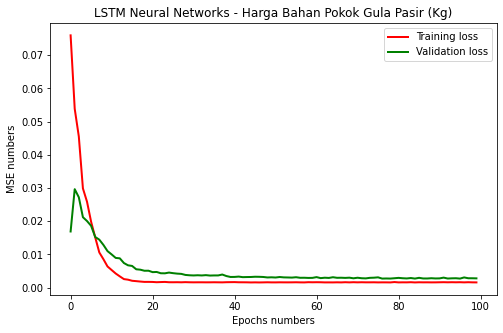

Epoch 1/100
41/41 [==============================] - 3s 21ms/step - loss: 0.1903 - accuracy: 0.3676 - val_loss: 0.0474 - val_accuracy: 0.1830
Epoch 2/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1049 - accuracy: 0.3660 - val_loss: 0.0345 - val_accuracy: 0.1830
Epoch 3/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0798 - accuracy: 0.3707 - val_loss: 0.0252 - val_accuracy: 0.1830
Epoch 4/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0613 - accuracy: 0.3692 - val_loss: 0.0233 - val_accuracy: 0.1830
Epoch 5/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0510 - accuracy: 0.3785 - val_loss: 0.0188 - val_accuracy: 0.1830
Epoch 6/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0505 - accuracy: 0.3785 - val_loss: 0.0284 - val_accuracy: 0.1830
Epoch 7/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0349 - accuracy: 0.3754 - val_loss: 0.0236 - val_accuracy: 0.1830
Epoch 8/100


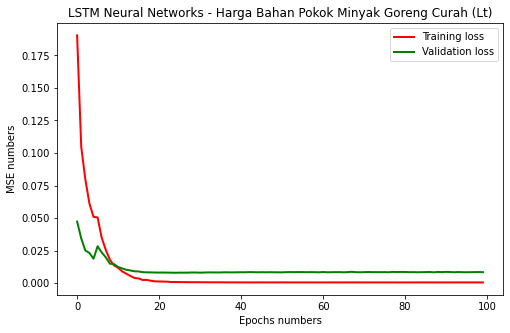

Epoch 1/100
41/41 [==============================] - 3s 21ms/step - loss: 0.2113 - accuracy: 0.3302 - val_loss: 0.1246 - val_accuracy: 0.0588
Epoch 2/100
41/41 [==============================] - 0s 11ms/step - loss: 0.1483 - accuracy: 0.3271 - val_loss: 0.0833 - val_accuracy: 0.0588
Epoch 3/100
41/41 [==============================] - 0s 10ms/step - loss: 0.1053 - accuracy: 0.3505 - val_loss: 0.0691 - val_accuracy: 0.0588
Epoch 4/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0961 - accuracy: 0.3567 - val_loss: 0.0541 - val_accuracy: 0.0588
Epoch 5/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0762 - accuracy: 0.3536 - val_loss: 0.0447 - val_accuracy: 0.0588
Epoch 6/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0585 - accuracy: 0.3583 - val_loss: 0.0373 - val_accuracy: 0.0588
Epoch 7/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0503 - accuracy: 0.3614 - val_loss: 0.0330 - val_accuracy: 0.0588
Epoch 8/10

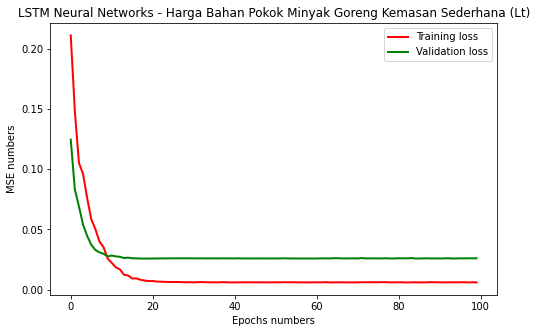

Epoch 1/100
41/41 [==============================] - 3s 20ms/step - loss: 0.2189 - accuracy: 0.4221 - val_loss: 0.0703 - val_accuracy: 0.1438
Epoch 2/100
41/41 [==============================] - 0s 7ms/step - loss: 0.1491 - accuracy: 0.3692 - val_loss: 0.0734 - val_accuracy: 0.1438
Epoch 3/100
41/41 [==============================] - 0s 9ms/step - loss: 0.1240 - accuracy: 0.4065 - val_loss: 0.0691 - val_accuracy: 0.1438
Epoch 4/100
41/41 [==============================] - 0s 11ms/step - loss: 0.1064 - accuracy: 0.3972 - val_loss: 0.0642 - val_accuracy: 0.1438
Epoch 5/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0865 - accuracy: 0.4128 - val_loss: 0.0619 - val_accuracy: 0.1438
Epoch 6/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0727 - accuracy: 0.4159 - val_loss: 0.0577 - val_accuracy: 0.1438
Epoch 7/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0545 - accuracy: 0.4206 - val_loss: 0.0539 - val_accuracy: 0.1438
Epoch 8/

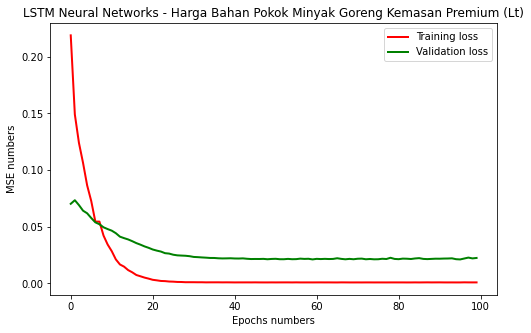

Epoch 1/100
41/41 [==============================] - 3s 20ms/step - loss: 0.2128 - accuracy: 0.5810 - val_loss: 0.0178 - val_accuracy: 0.5294
Epoch 2/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1329 - accuracy: 0.6869 - val_loss: 0.0126 - val_accuracy: 0.5294
Epoch 3/100
41/41 [==============================] - 0s 7ms/step - loss: 0.1085 - accuracy: 0.7118 - val_loss: 0.0115 - val_accuracy: 0.5294
Epoch 4/100
41/41 [==============================] - 0s 10ms/step - loss: 0.1111 - accuracy: 0.6916 - val_loss: 0.0199 - val_accuracy: 0.5294
Epoch 5/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0939 - accuracy: 0.7227 - val_loss: 0.0133 - val_accuracy: 0.5294
Epoch 6/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0818 - accuracy: 0.7212 - val_loss: 0.0090 - val_accuracy: 0.5294
Epoch 7/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0711 - accuracy: 0.7336 - val_loss: 0.0073 - val_accuracy: 0.5294
Epoch 8/100

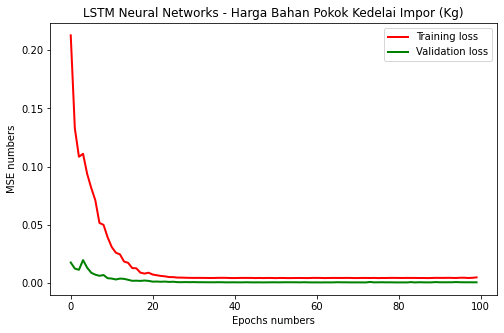

Epoch 1/100
41/41 [==============================] - 4s 23ms/step - loss: 0.2474 - accuracy: 0.4221 - val_loss: 0.0594 - val_accuracy: 0.4314
Epoch 2/100
41/41 [==============================] - 0s 10ms/step - loss: 0.2022 - accuracy: 0.4112 - val_loss: 0.0141 - val_accuracy: 0.4314
Epoch 3/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1549 - accuracy: 0.4626 - val_loss: 0.0199 - val_accuracy: 0.4314
Epoch 4/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1296 - accuracy: 0.4657 - val_loss: 0.0202 - val_accuracy: 0.4248
Epoch 5/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0996 - accuracy: 0.4891 - val_loss: 0.0316 - val_accuracy: 0.4248
Epoch 6/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0994 - accuracy: 0.4969 - val_loss: 0.0199 - val_accuracy: 0.4248
Epoch 7/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0814 - accuracy: 0.5062 - val_loss: 0.0183 - val_accuracy: 0.4314
Epoch 8/100

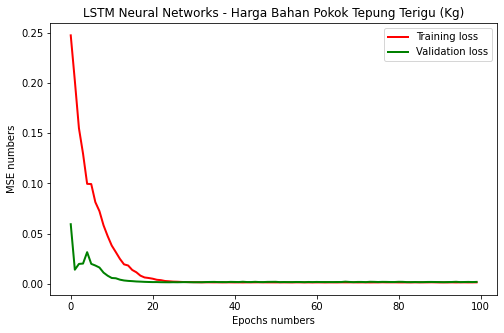

Epoch 1/100
41/41 [==============================] - 3s 20ms/step - loss: 0.2798 - accuracy: 0.4439 - val_loss: 0.0765 - val_accuracy: 0.5882
Epoch 2/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1682 - accuracy: 0.4206 - val_loss: 0.0167 - val_accuracy: 0.5882
Epoch 3/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1588 - accuracy: 0.4143 - val_loss: 0.0347 - val_accuracy: 0.5882
Epoch 4/100
41/41 [==============================] - 0s 10ms/step - loss: 0.1127 - accuracy: 0.4190 - val_loss: 0.0154 - val_accuracy: 0.5882
Epoch 5/100
41/41 [==============================] - 0s 11ms/step - loss: 0.0951 - accuracy: 0.4190 - val_loss: 0.0123 - val_accuracy: 0.5882
Epoch 6/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0941 - accuracy: 0.4190 - val_loss: 0.0125 - val_accuracy: 0.5882
Epoch 7/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0723 - accuracy: 0.4346 - val_loss: 0.0120 - val_accuracy: 0.5882
Epoch 8/10

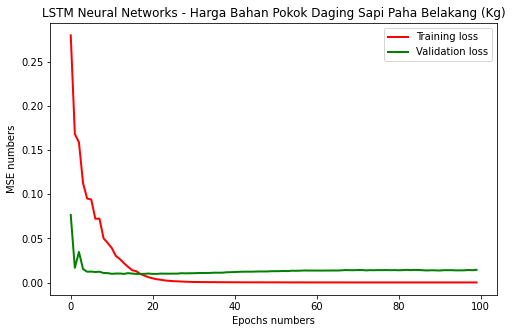

Epoch 1/100
41/41 [==============================] - 3s 22ms/step - loss: 0.1031 - accuracy: 0.0078 - val_loss: 0.0297 - val_accuracy: 0.0196
Epoch 2/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0803 - accuracy: 0.0078 - val_loss: 0.0119 - val_accuracy: 0.0196
Epoch 3/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0609 - accuracy: 0.0078 - val_loss: 0.0114 - val_accuracy: 0.0196
Epoch 4/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0460 - accuracy: 0.0078 - val_loss: 0.0100 - val_accuracy: 0.0196
Epoch 5/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0374 - accuracy: 0.0078 - val_loss: 0.0089 - val_accuracy: 0.0196
Epoch 6/100
41/41 [==============================] - 0s 11ms/step - loss: 0.0357 - accuracy: 0.0078 - val_loss: 0.0076 - val_accuracy: 0.0196
Epoch 7/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0286 - accuracy: 0.0078 - val_loss: 0.0072 - val_accuracy: 0.0196
Epoch 8/

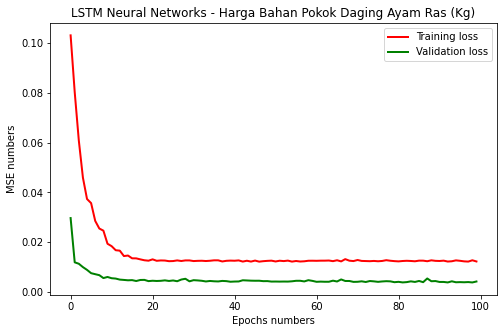

Epoch 1/100
41/41 [==============================] - 4s 41ms/step - loss: 0.1559 - accuracy: 0.3660 - val_loss: 0.0396 - val_accuracy: 0.1830
Epoch 2/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0630 - accuracy: 0.3629 - val_loss: 0.0196 - val_accuracy: 0.1830
Epoch 3/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0486 - accuracy: 0.3660 - val_loss: 0.0210 - val_accuracy: 0.1830
Epoch 4/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0393 - accuracy: 0.3723 - val_loss: 0.0225 - val_accuracy: 0.1830
Epoch 5/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0345 - accuracy: 0.3707 - val_loss: 0.0201 - val_accuracy: 0.1830
Epoch 6/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0292 - accuracy: 0.3723 - val_loss: 0.0185 - val_accuracy: 0.1830
Epoch 7/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0212 - accuracy: 0.3723 - val_loss: 0.0169 - val_accuracy: 0.1830
Epoch 8/100


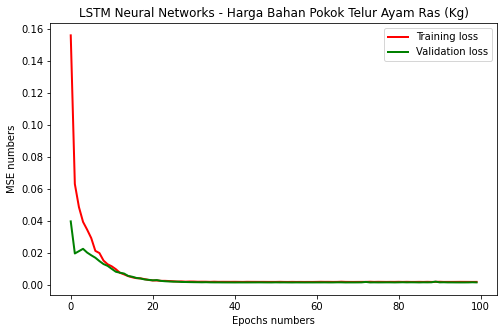

Epoch 1/100
41/41 [==============================] - 3s 23ms/step - loss: 0.1600 - accuracy: 0.0452 - val_loss: 0.0457 - val_accuracy: 0.0196
Epoch 2/100
41/41 [==============================] - 0s 9ms/step - loss: 0.1326 - accuracy: 0.0421 - val_loss: 0.0754 - val_accuracy: 0.0196
Epoch 3/100
41/41 [==============================] - 0s 9ms/step - loss: 0.1288 - accuracy: 0.0452 - val_loss: 0.0550 - val_accuracy: 0.0196
Epoch 4/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1081 - accuracy: 0.0436 - val_loss: 0.0456 - val_accuracy: 0.0196
Epoch 5/100
41/41 [==============================] - 0s 7ms/step - loss: 0.0930 - accuracy: 0.0452 - val_loss: 0.0436 - val_accuracy: 0.0196
Epoch 6/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0738 - accuracy: 0.0452 - val_loss: 0.0436 - val_accuracy: 0.0196
Epoch 7/100
41/41 [==============================] - 0s 12ms/step - loss: 0.0739 - accuracy: 0.0452 - val_loss: 0.0428 - val_accuracy: 0.0196
Epoch 8/100

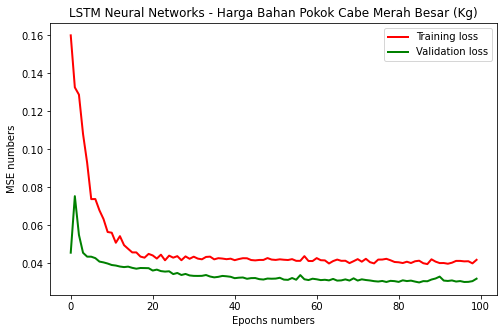

Epoch 1/100
41/41 [==============================] - 3s 20ms/step - loss: 0.2836 - accuracy: 0.0296 - val_loss: 0.3446 - val_accuracy: 0.0131
Epoch 2/100
41/41 [==============================] - 0s 10ms/step - loss: 0.2371 - accuracy: 0.0467 - val_loss: 0.3301 - val_accuracy: 0.0131
Epoch 3/100
41/41 [==============================] - 0s 10ms/step - loss: 0.1726 - accuracy: 0.0421 - val_loss: 0.2702 - val_accuracy: 0.0131
Epoch 5/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1663 - accuracy: 0.0467 - val_loss: 0.2452 - val_accuracy: 0.0131
Epoch 6/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1313 - accuracy: 0.0467 - val_loss: 0.2222 - val_accuracy: 0.0131
Epoch 7/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1180 - accuracy: 0.0436 - val_loss: 0.2038 - val_accuracy: 0.0131
Epoch 8/100
41/41 [==============================] - 0s 9ms/step - loss: 0.1028 - accuracy: 0.0467 - val_loss: 0.1745 - val_accuracy: 0.0131
Epoch 9/10

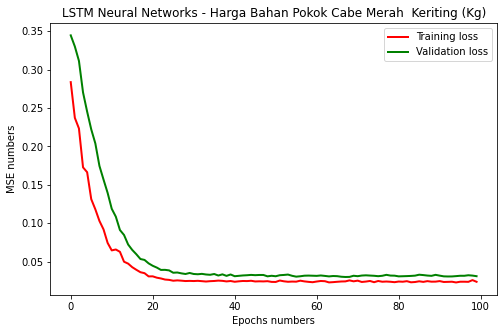

Epoch 1/100
41/41 [==============================] - 3s 22ms/step - loss: 0.2132 - accuracy: 0.0218 - val_loss: 0.1161 - val_accuracy: 0.0065
Epoch 2/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1401 - accuracy: 0.0218 - val_loss: 0.1113 - val_accuracy: 0.0065
Epoch 3/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1381 - accuracy: 0.0218 - val_loss: 0.1121 - val_accuracy: 0.0065
Epoch 4/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1320 - accuracy: 0.0202 - val_loss: 0.1112 - val_accuracy: 0.0065
Epoch 5/100
41/41 [==============================] - 0s 12ms/step - loss: 0.1073 - accuracy: 0.0218 - val_loss: 0.1154 - val_accuracy: 0.0065
Epoch 6/100
41/41 [==============================] - 0s 9ms/step - loss: 0.1039 - accuracy: 0.0218 - val_loss: 0.1166 - val_accuracy: 0.0065
Epoch 7/100
41/41 [==============================] - 0s 9ms/step - loss: 0.1027 - accuracy: 0.0218 - val_loss: 0.1182 - val_accuracy: 0.0065
Epoch 8/100

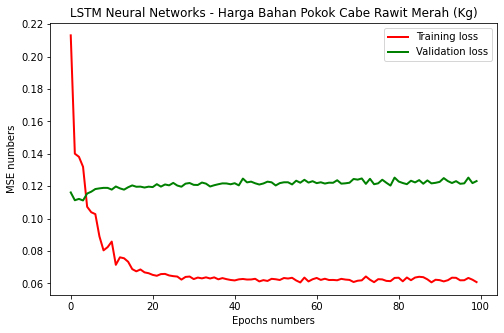

Epoch 1/100
41/41 [==============================] - 4s 24ms/step - loss: 0.1765 - accuracy: 0.0312 - val_loss: 0.0429 - val_accuracy: 0.0065
Epoch 2/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1033 - accuracy: 0.0358 - val_loss: 0.0088 - val_accuracy: 0.0261
Epoch 3/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0769 - accuracy: 0.0389 - val_loss: 0.0111 - val_accuracy: 0.0261
Epoch 4/100
41/41 [==============================] - 0s 11ms/step - loss: 0.0701 - accuracy: 0.0389 - val_loss: 0.0124 - val_accuracy: 0.0261
Epoch 5/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0571 - accuracy: 0.0389 - val_loss: 0.0116 - val_accuracy: 0.0261
Epoch 6/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0544 - accuracy: 0.0374 - val_loss: 0.0134 - val_accuracy: 0.0261
Epoch 7/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0460 - accuracy: 0.0389 - val_loss: 0.0127 - val_accuracy: 0.0261
Epoch 8/10

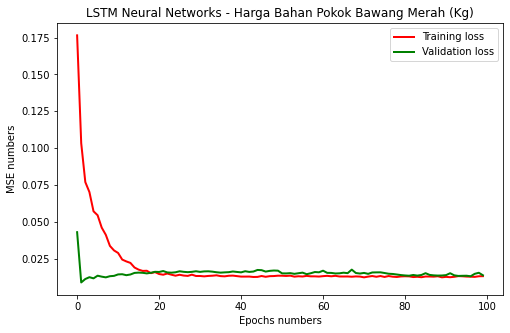

Epoch 1/100
41/41 [==============================] - 3s 23ms/step - loss: 0.1522 - accuracy: 0.0701 - val_loss: 0.0593 - val_accuracy: 0.0458
Epoch 2/100
41/41 [==============================] - 0s 10ms/step - loss: 0.1141 - accuracy: 0.0717 - val_loss: 0.0718 - val_accuracy: 0.0458
Epoch 3/100
41/41 [==============================] - 0s 11ms/step - loss: 0.0826 - accuracy: 0.0701 - val_loss: 0.0519 - val_accuracy: 0.0458
Epoch 4/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0718 - accuracy: 0.0717 - val_loss: 0.0256 - val_accuracy: 0.0458
Epoch 5/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0518 - accuracy: 0.0732 - val_loss: 0.0192 - val_accuracy: 0.0458
Epoch 6/100
41/41 [==============================] - 0s 11ms/step - loss: 0.0487 - accuracy: 0.0732 - val_loss: 0.0149 - val_accuracy: 0.0458
Epoch 7/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0445 - accuracy: 0.0732 - val_loss: 0.0140 - val_accuracy: 0.0458
Epoch 

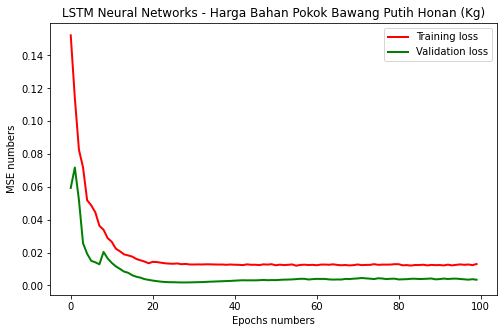

In [27]:
#parameter tuning
aim = df.columns
window_len = 10
test_size = 0.2
zero_base = True
lstm_neurons = 50
epochs = 100
batch_size = 16
loss = 'mse'
dropout = 0.24
optimizer = 'adam'

#run model LSTM
MAPE = []
for i in aim:
  train_data, test_data, X_train, X_test, y_train, y_test = prepare_data(
                                                            df, aim = i, window_len=window_len, zero_base=zero_base, test_size=test_size)
  
  model = model_lstm(X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss, optimizer=optimizer)
  modelfit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)
  #targets = test_data[i][window_len:]
  preds = model.predict(X_test).squeeze()
  MAPE.append(mape(preds, y_test))

  plt.figure(figsize=(8, 5))
  plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
  plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
  plt.title('LSTM Neural Networks - Harga Bahan Pokok {}'.format(i))
  plt.xlabel('Epochs numbers')
  plt.ylabel('MSE numbers')
  plt.legend()
  plt.show()

`data (df) dengan scalling`

Epoch 1/100
41/41 [==============================] - 3s 22ms/step - loss: 0.2259 - accuracy: 0.4081 - val_loss: 0.0471 - val_accuracy: 0.5752
Epoch 2/100
41/41 [==============================] - 0s 9ms/step - loss: 0.1831 - accuracy: 0.3988 - val_loss: 0.0330 - val_accuracy: 0.5752
Epoch 3/100
41/41 [==============================] - 0s 9ms/step - loss: 0.1414 - accuracy: 0.3956 - val_loss: 0.0204 - val_accuracy: 0.5752
Epoch 4/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1274 - accuracy: 0.4081 - val_loss: 0.0155 - val_accuracy: 0.5752
Epoch 5/100
41/41 [==============================] - 0s 7ms/step - loss: 0.1016 - accuracy: 0.4112 - val_loss: 0.0112 - val_accuracy: 0.5752
Epoch 6/100
41/41 [==============================] - 0s 7ms/step - loss: 0.0859 - accuracy: 0.4315 - val_loss: 0.0084 - val_accuracy: 0.5752
Epoch 7/100
41/41 [==============================] - 0s 7ms/step - loss: 0.0766 - accuracy: 0.4268 - val_loss: 0.0062 - val_accuracy: 0.5752
Epoch 8/100


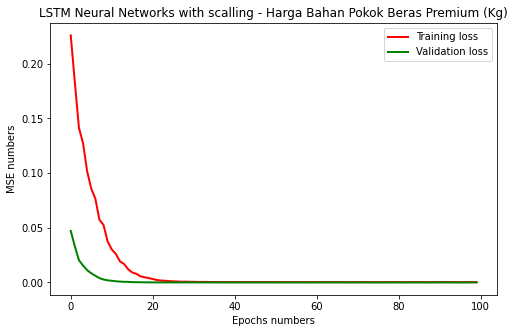

Epoch 1/100
41/41 [==============================] - 4s 24ms/step - loss: 0.3204 - accuracy: 0.4735 - val_loss: 0.0807 - val_accuracy: 0.2092
Epoch 2/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1277 - accuracy: 0.4548 - val_loss: 0.0653 - val_accuracy: 0.2092
Epoch 3/100
41/41 [==============================] - 0s 10ms/step - loss: 0.1128 - accuracy: 0.4766 - val_loss: 0.0703 - val_accuracy: 0.2092
Epoch 4/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0933 - accuracy: 0.4844 - val_loss: 0.0366 - val_accuracy: 0.2092
Epoch 5/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0713 - accuracy: 0.4798 - val_loss: 0.0287 - val_accuracy: 0.2092
Epoch 6/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0603 - accuracy: 0.4875 - val_loss: 0.0242 - val_accuracy: 0.2092
Epoch 7/100
41/41 [==============================] - 0s 7ms/step - loss: 0.0502 - accuracy: 0.4938 - val_loss: 0.0219 - val_accuracy: 0.2092
Epoch 8/10

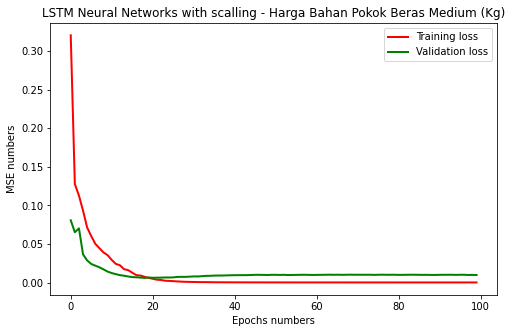

Epoch 1/100
41/41 [==============================] - 3s 19ms/step - loss: 0.2220 - accuracy: 0.4003 - val_loss: 0.1916 - val_accuracy: 0.3333
Epoch 2/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1531 - accuracy: 0.3847 - val_loss: 0.1113 - val_accuracy: 0.3333
Epoch 3/100
41/41 [==============================] - 0s 7ms/step - loss: 0.1625 - accuracy: 0.3536 - val_loss: 0.0950 - val_accuracy: 0.3333
Epoch 4/100
41/41 [==============================] - 0s 7ms/step - loss: 0.1166 - accuracy: 0.3956 - val_loss: 0.0713 - val_accuracy: 0.3333
Epoch 5/100
41/41 [==============================] - 0s 7ms/step - loss: 0.0914 - accuracy: 0.3910 - val_loss: 0.0195 - val_accuracy: 0.3333
Epoch 6/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0777 - accuracy: 0.3972 - val_loss: 0.0138 - val_accuracy: 0.3333
Epoch 7/100
41/41 [==============================] - 0s 7ms/step - loss: 0.0649 - accuracy: 0.4019 - val_loss: 0.0130 - val_accuracy: 0.3333
Epoch 8/100


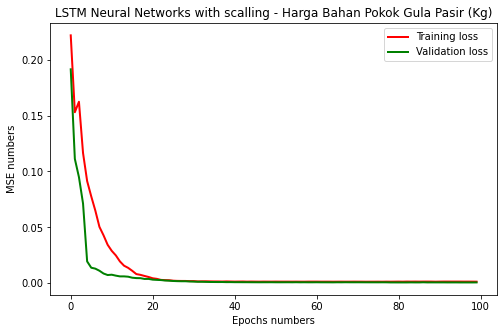

Epoch 1/100
41/41 [==============================] - 3s 19ms/step - loss: 0.2503 - accuracy: 0.3333 - val_loss: 0.1208 - val_accuracy: 0.1830
Epoch 2/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1441 - accuracy: 0.3442 - val_loss: 0.0641 - val_accuracy: 0.1830
Epoch 3/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1330 - accuracy: 0.3411 - val_loss: 0.0409 - val_accuracy: 0.1830
Epoch 4/100
41/41 [==============================] - 0s 7ms/step - loss: 0.1061 - accuracy: 0.3536 - val_loss: 0.0375 - val_accuracy: 0.1830
Epoch 5/100
41/41 [==============================] - 1s 13ms/step - loss: 0.0907 - accuracy: 0.3567 - val_loss: 0.0207 - val_accuracy: 0.1830
Epoch 6/100
41/41 [==============================] - 1s 14ms/step - loss: 0.0883 - accuracy: 0.3583 - val_loss: 0.0138 - val_accuracy: 0.1830
Epoch 7/100
41/41 [==============================] - 1s 14ms/step - loss: 0.0550 - accuracy: 0.3723 - val_loss: 0.0109 - val_accuracy: 0.1830
Epoch 8/1

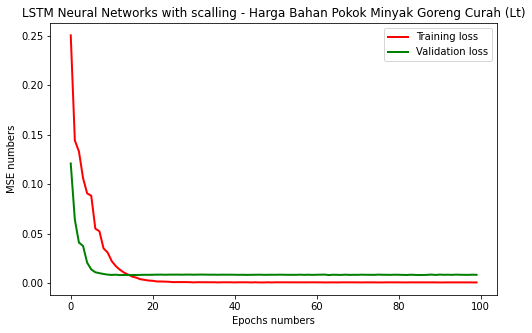

Epoch 1/100
41/41 [==============================] - 4s 21ms/step - loss: 0.1431 - accuracy: 0.3178 - val_loss: 0.0311 - val_accuracy: 0.0588
Epoch 2/100
41/41 [==============================] - 0s 7ms/step - loss: 0.1079 - accuracy: 0.3396 - val_loss: 0.0231 - val_accuracy: 0.0588
Epoch 3/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0837 - accuracy: 0.3474 - val_loss: 0.0243 - val_accuracy: 0.0588
Epoch 4/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0589 - accuracy: 0.3583 - val_loss: 0.0204 - val_accuracy: 0.0588
Epoch 5/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0480 - accuracy: 0.3567 - val_loss: 0.0187 - val_accuracy: 0.0588
Epoch 6/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0375 - accuracy: 0.3629 - val_loss: 0.0169 - val_accuracy: 0.0588
Epoch 7/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0317 - accuracy: 0.3629 - val_loss: 0.0132 - val_accuracy: 0.0588
Epoch 8/100


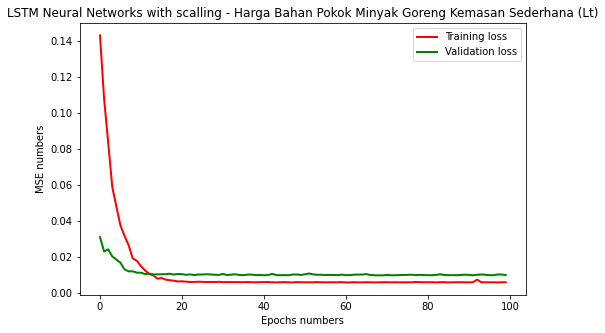

Epoch 1/100
41/41 [==============================] - 3s 26ms/step - loss: 0.2941 - accuracy: 0.3754 - val_loss: 0.1728 - val_accuracy: 0.1438
Epoch 2/100
41/41 [==============================] - 0s 11ms/step - loss: 0.1762 - accuracy: 0.3723 - val_loss: 0.1312 - val_accuracy: 0.1438
Epoch 3/100
41/41 [==============================] - 0s 10ms/step - loss: 0.1502 - accuracy: 0.4019 - val_loss: 0.0880 - val_accuracy: 0.1438
Epoch 4/100
41/41 [==============================] - 0s 11ms/step - loss: 0.1400 - accuracy: 0.3879 - val_loss: 0.0486 - val_accuracy: 0.1438
Epoch 5/100
41/41 [==============================] - 0s 11ms/step - loss: 0.1053 - accuracy: 0.4159 - val_loss: 0.0360 - val_accuracy: 0.1438
Epoch 6/100
41/41 [==============================] - 0s 11ms/step - loss: 0.0851 - accuracy: 0.4174 - val_loss: 0.0316 - val_accuracy: 0.1438
Epoch 7/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0729 - accuracy: 0.4174 - val_loss: 0.0289 - val_accuracy: 0.1438
Epoch 

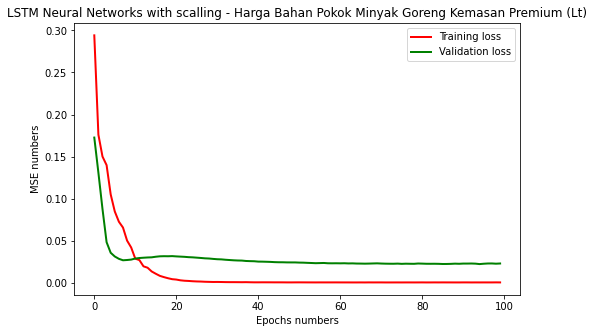

Epoch 1/100
41/41 [==============================] - 3s 23ms/step - loss: 0.1652 - accuracy: 0.7150 - val_loss: 0.0168 - val_accuracy: 0.5294
Epoch 2/100
41/41 [==============================] - 0s 9ms/step - loss: 0.1075 - accuracy: 0.7321 - val_loss: 0.0050 - val_accuracy: 0.5294
Epoch 3/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0759 - accuracy: 0.7383 - val_loss: 0.0079 - val_accuracy: 0.5294
Epoch 4/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0766 - accuracy: 0.7477 - val_loss: 0.0045 - val_accuracy: 0.5294
Epoch 5/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0645 - accuracy: 0.7461 - val_loss: 0.0039 - val_accuracy: 0.5294
Epoch 6/100
41/41 [==============================] - 0s 11ms/step - loss: 0.0506 - accuracy: 0.7508 - val_loss: 0.0035 - val_accuracy: 0.5294
Epoch 7/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0430 - accuracy: 0.7539 - val_loss: 0.0030 - val_accuracy: 0.5294
Epoch 8/1

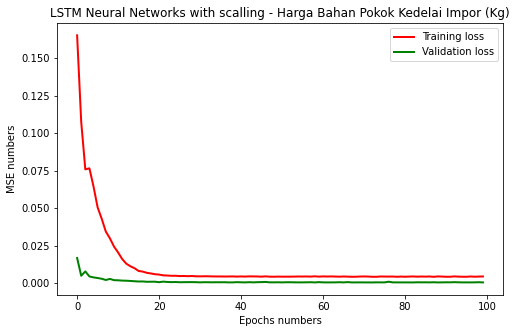

Epoch 1/100
41/41 [==============================] - 3s 19ms/step - loss: 0.1851 - accuracy: 0.4470 - val_loss: 0.0209 - val_accuracy: 0.4314
Epoch 2/100
41/41 [==============================] - 0s 8ms/step - loss: 0.1307 - accuracy: 0.4766 - val_loss: 0.0285 - val_accuracy: 0.4314
Epoch 3/100
41/41 [==============================] - 0s 7ms/step - loss: 0.1238 - accuracy: 0.4860 - val_loss: 0.0122 - val_accuracy: 0.4314
Epoch 4/100
41/41 [==============================] - 0s 7ms/step - loss: 0.0985 - accuracy: 0.4953 - val_loss: 0.0071 - val_accuracy: 0.4314
Epoch 5/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0769 - accuracy: 0.5062 - val_loss: 0.0072 - val_accuracy: 0.4314
Epoch 6/100
41/41 [==============================] - 0s 7ms/step - loss: 0.0672 - accuracy: 0.5093 - val_loss: 0.0099 - val_accuracy: 0.4314
Epoch 7/100
41/41 [==============================] - 0s 7ms/step - loss: 0.0490 - accuracy: 0.5202 - val_loss: 0.0070 - val_accuracy: 0.4314
Epoch 8/100


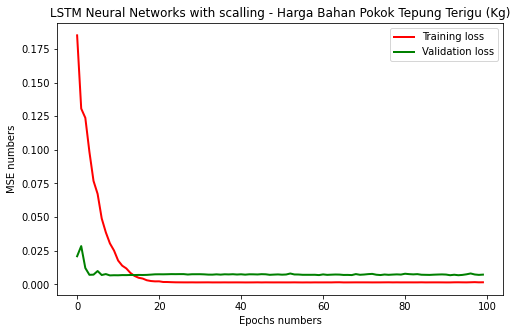

Epoch 1/100
41/41 [==============================] - 3s 21ms/step - loss: 1.2396 - accuracy: 0.4455 - val_loss: 0.3755 - val_accuracy: 0.5882
Epoch 2/100
41/41 [==============================] - 0s 8ms/step - loss: 0.3814 - accuracy: 0.4408 - val_loss: 0.1152 - val_accuracy: 0.5882
Epoch 3/100
41/41 [==============================] - 0s 9ms/step - loss: 0.2272 - accuracy: 0.4408 - val_loss: 0.0547 - val_accuracy: 0.5882
Epoch 4/100
41/41 [==============================] - 0s 10ms/step - loss: 0.1579 - accuracy: 0.4268 - val_loss: 0.0300 - val_accuracy: 0.5882
Epoch 5/100
41/41 [==============================] - 0s 11ms/step - loss: 0.1144 - accuracy: 0.4190 - val_loss: 0.0238 - val_accuracy: 0.5882
Epoch 6/100
41/41 [==============================] - 0s 11ms/step - loss: 0.1279 - accuracy: 0.4097 - val_loss: 0.0223 - val_accuracy: 0.5882
Epoch 7/100
41/41 [==============================] - 0s 11ms/step - loss: 0.1071 - accuracy: 0.4237 - val_loss: 0.0212 - val_accuracy: 0.5882
Epoch 8/

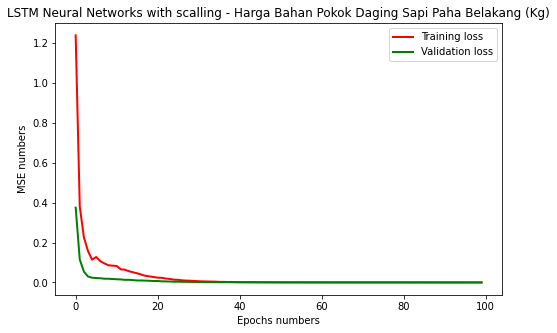

Epoch 1/100
41/41 [==============================] - 3s 23ms/step - loss: 0.2227 - accuracy: 0.0078 - val_loss: 0.0232 - val_accuracy: 0.0196
Epoch 2/100
41/41 [==============================] - 0s 11ms/step - loss: 0.1175 - accuracy: 0.0078 - val_loss: 0.0192 - val_accuracy: 0.0196
Epoch 3/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0861 - accuracy: 0.0078 - val_loss: 0.0140 - val_accuracy: 0.0196
Epoch 4/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0817 - accuracy: 0.0078 - val_loss: 0.0127 - val_accuracy: 0.0196
Epoch 5/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0680 - accuracy: 0.0078 - val_loss: 0.0117 - val_accuracy: 0.0196
Epoch 6/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0526 - accuracy: 0.0062 - val_loss: 0.0114 - val_accuracy: 0.0196
Epoch 7/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0544 - accuracy: 0.0078 - val_loss: 0.0113 - val_accuracy: 0.0196
Epoch 8/10

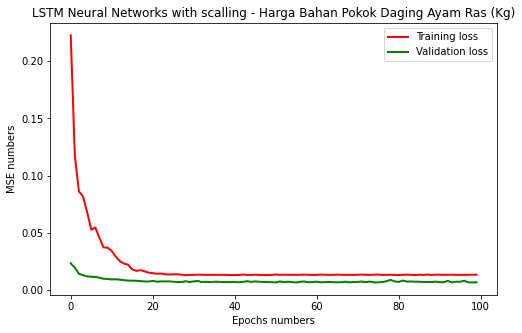

Epoch 1/100
41/41 [==============================] - 3s 20ms/step - loss: 0.3616 - accuracy: 0.2960 - val_loss: 0.0575 - val_accuracy: 0.1830
Epoch 2/100
41/41 [==============================] - 0s 10ms/step - loss: 0.2277 - accuracy: 0.3084 - val_loss: 0.0339 - val_accuracy: 0.1830
Epoch 3/100
41/41 [==============================] - 0s 10ms/step - loss: 0.1204 - accuracy: 0.3474 - val_loss: 0.0314 - val_accuracy: 0.1830
Epoch 4/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0801 - accuracy: 0.3567 - val_loss: 0.0227 - val_accuracy: 0.1830
Epoch 5/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0618 - accuracy: 0.3645 - val_loss: 0.0186 - val_accuracy: 0.1830
Epoch 6/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0493 - accuracy: 0.3645 - val_loss: 0.0165 - val_accuracy: 0.1830
Epoch 7/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0378 - accuracy: 0.3707 - val_loss: 0.0151 - val_accuracy: 0.1830
Epoch 8/1

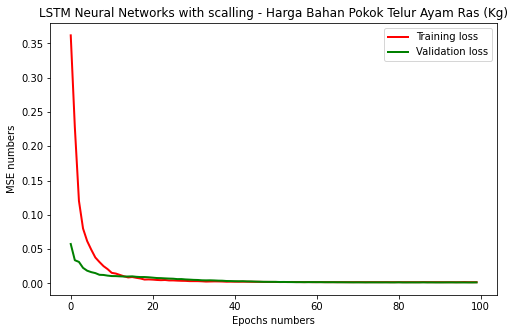

Epoch 1/100
41/41 [==============================] - 4s 22ms/step - loss: 0.1609 - accuracy: 0.0436 - val_loss: 0.1478 - val_accuracy: 0.0196
Epoch 2/100
41/41 [==============================] - 0s 10ms/step - loss: 0.1389 - accuracy: 0.0436 - val_loss: 0.1043 - val_accuracy: 0.0196
Epoch 3/100
41/41 [==============================] - 0s 10ms/step - loss: 0.1269 - accuracy: 0.0421 - val_loss: 0.1064 - val_accuracy: 0.0196
Epoch 4/100
41/41 [==============================] - 0s 10ms/step - loss: 0.1042 - accuracy: 0.0436 - val_loss: 0.0969 - val_accuracy: 0.0196
Epoch 5/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0939 - accuracy: 0.0452 - val_loss: 0.0823 - val_accuracy: 0.0196
Epoch 6/100
41/41 [==============================] - 0s 11ms/step - loss: 0.0843 - accuracy: 0.0436 - val_loss: 0.0818 - val_accuracy: 0.0196
Epoch 7/100
41/41 [==============================] - 0s 11ms/step - loss: 0.0779 - accuracy: 0.0452 - val_loss: 0.0698 - val_accuracy: 0.0196
Epoch 8

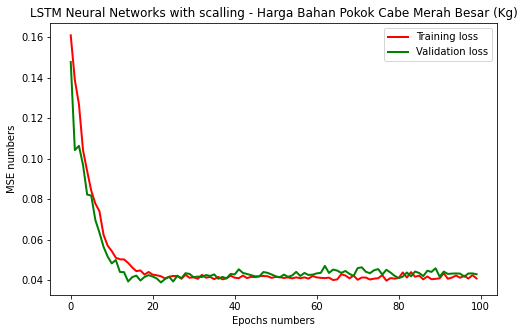

Epoch 1/100
41/41 [==============================] - 3s 21ms/step - loss: 0.2402 - accuracy: 0.0452 - val_loss: 0.1086 - val_accuracy: 0.0131
Epoch 2/100
41/41 [==============================] - 0s 11ms/step - loss: 0.1579 - accuracy: 0.0467 - val_loss: 0.0879 - val_accuracy: 0.0131
Epoch 3/100
41/41 [==============================] - 0s 11ms/step - loss: 0.1367 - accuracy: 0.0467 - val_loss: 0.0742 - val_accuracy: 0.0131
Epoch 4/100
41/41 [==============================] - 0s 10ms/step - loss: 0.1152 - accuracy: 0.0467 - val_loss: 0.0622 - val_accuracy: 0.0131
Epoch 5/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0818 - accuracy: 0.0498 - val_loss: 0.0548 - val_accuracy: 0.0131
Epoch 6/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0708 - accuracy: 0.0483 - val_loss: 0.0496 - val_accuracy: 0.0131
Epoch 7/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0628 - accuracy: 0.0498 - val_loss: 0.0479 - val_accuracy: 0.0131
Epoch 8/1

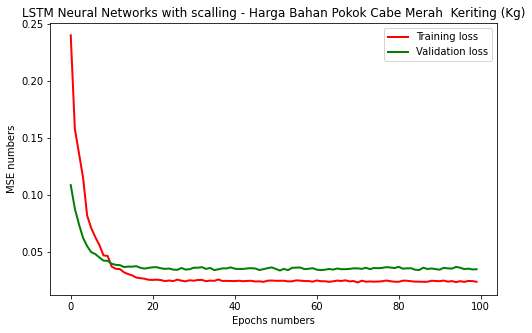

Epoch 1/100
41/41 [==============================] - 3s 25ms/step - loss: 0.3477 - accuracy: 0.0093 - val_loss: 0.1547 - val_accuracy: 0.0065
Epoch 2/100
41/41 [==============================] - 0s 10ms/step - loss: 0.2022 - accuracy: 0.0202 - val_loss: 0.1390 - val_accuracy: 0.0065
Epoch 3/100
41/41 [==============================] - 0s 11ms/step - loss: 0.1801 - accuracy: 0.0187 - val_loss: 0.1384 - val_accuracy: 0.0065
Epoch 4/100
41/41 [==============================] - 0s 10ms/step - loss: 0.1957 - accuracy: 0.0218 - val_loss: 0.1368 - val_accuracy: 0.0065
Epoch 5/100
41/41 [==============================] - 0s 9ms/step - loss: 0.1605 - accuracy: 0.0171 - val_loss: 0.1355 - val_accuracy: 0.0065
Epoch 6/100
41/41 [==============================] - 0s 9ms/step - loss: 0.1378 - accuracy: 0.0218 - val_loss: 0.1320 - val_accuracy: 0.0065
Epoch 7/100
41/41 [==============================] - 0s 9ms/step - loss: 0.1315 - accuracy: 0.0187 - val_loss: 0.1349 - val_accuracy: 0.0065
Epoch 8/1

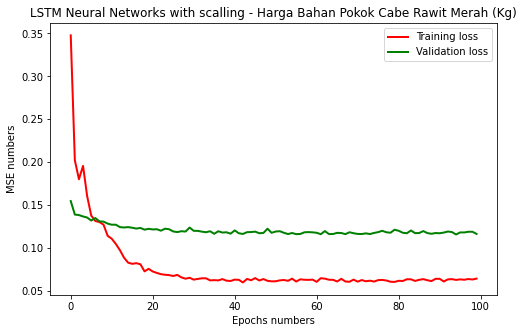

Epoch 1/100
41/41 [==============================] - 3s 35ms/step - loss: 1.0612 - accuracy: 0.0047 - val_loss: 0.4783 - val_accuracy: 0.0000e+00
Epoch 2/100
41/41 [==============================] - 0s 9ms/step - loss: 0.2990 - accuracy: 0.0249 - val_loss: 0.1437 - val_accuracy: 0.0261
Epoch 3/100
41/41 [==============================] - 0s 9ms/step - loss: 0.1527 - accuracy: 0.0358 - val_loss: 0.0442 - val_accuracy: 0.0261
Epoch 4/100
41/41 [==============================] - 0s 10ms/step - loss: 0.1173 - accuracy: 0.0374 - val_loss: 0.0231 - val_accuracy: 0.0261
Epoch 5/100
41/41 [==============================] - 0s 10ms/step - loss: 0.1048 - accuracy: 0.0374 - val_loss: 0.0205 - val_accuracy: 0.0261
Epoch 6/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0817 - accuracy: 0.0389 - val_loss: 0.0168 - val_accuracy: 0.0261
Epoch 7/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0890 - accuracy: 0.0343 - val_loss: 0.0148 - val_accuracy: 0.0261
Epoc

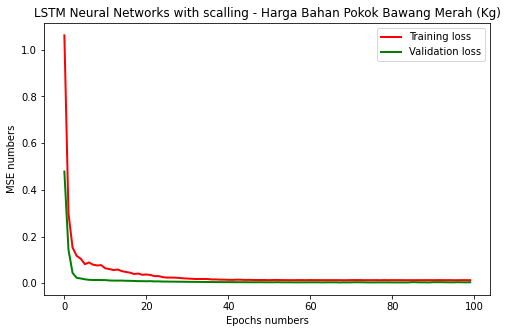

Epoch 1/100
41/41 [==============================] - 3s 23ms/step - loss: 0.1848 - accuracy: 0.0654 - val_loss: 0.0119 - val_accuracy: 0.0458
Epoch 2/100
41/41 [==============================] - 0s 9ms/step - loss: 0.1413 - accuracy: 0.0654 - val_loss: 0.0216 - val_accuracy: 0.0458
Epoch 3/100
41/41 [==============================] - 0s 7ms/step - loss: 0.1222 - accuracy: 0.0670 - val_loss: 0.0121 - val_accuracy: 0.0458
Epoch 4/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0959 - accuracy: 0.0732 - val_loss: 0.0081 - val_accuracy: 0.0458
Epoch 5/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0815 - accuracy: 0.0717 - val_loss: 0.0050 - val_accuracy: 0.0458
Epoch 6/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0650 - accuracy: 0.0717 - val_loss: 0.0041 - val_accuracy: 0.0458
Epoch 7/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0508 - accuracy: 0.0732 - val_loss: 0.0044 - val_accuracy: 0.0458
Epoch 8/100


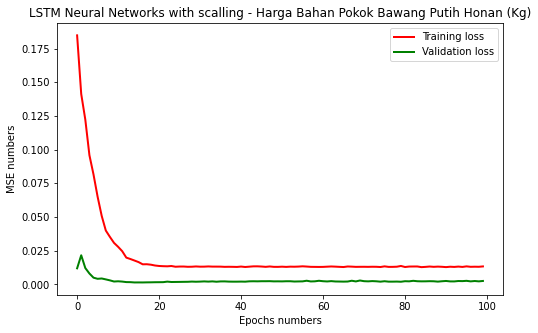

In [28]:
def normal_min_max(continuous):
    return (continuous - continuous.min()) / (df.max() - continuous.min())

df_minmax = normal_min_max(df)

#run model LSTM
MAPE_scaled = []
for i in aim:
  train_data, test_data, X_train, X_test, y_train, y_test = prepare_data(
                                                            df_minmax, aim = i, window_len=window_len, zero_base=zero_base, test_size=test_size)
  
  model = model_lstm(X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss, optimizer=optimizer)
  modelfit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)
  #targets = test_data[i][window_len:]
  preds = model.predict(X_test).squeeze()
  MAPE_scaled.append(mape(preds, y_test))

  plt.figure(figsize=(8, 5))
  plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
  plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
  plt.title('LSTM Neural Networks with scalling - Harga Bahan Pokok {}'.format(i))
  plt.xlabel('Epochs numbers')
  plt.ylabel('MSE numbers')
  plt.legend()
  plt.show()

In [29]:
LSTM = pd.DataFrame(list(zip(aim, MAPE, MAPE_scaled)),columns =['Jenis Bahan Pokok', 'MAPE tanpa minmax', 'MAPE dengan minmax'])
print('rata-rata MAPE tanpa minmax = ',LSTM['MAPE tanpa minmax'].mean())
print('rata-rata MAPE dengan minmax = ',LSTM['MAPE dengan minmax'].mean()) 
LSTM

rata-rata MAPE tanpa minmax =  3183.491660117357
rata-rata MAPE dengan minmax =  1837.441314236066


Jenis Bahan Pokok  MAPE tanpa minmax  \
0                     Beras Premium (Kg)         372.348955   
1                      Beras Medium (Kg)        1410.833598   
2                        Gula Pasir (Kg)        1553.551471   
3               Minyak Goreng Curah (Lt)        2264.492896   
4   Minyak Goreng Kemasan Sederhana (Lt)         418.390134   
5     Minyak Goreng Kemasan Premium (Lt)        1455.221691   
6                     Kedelai Impor (Kg)         431.854188   
7                     Tepung Terigu (Kg)         740.596972   
8         Daging Sapi Paha Belakang (Kg)         600.325044   
9                   Daging Ayam Ras (Kg)         353.735977   
10                   Telur Ayam Ras (Kg)       37641.844883   
11                 Cabe Merah Besar (Kg)         943.240960   
12             Cabe Merah  Keriting (Kg)         934.670170   
13                 Cabe Rawit Merah (Kg)        1130.225814   
14                     Bawang Merah (Kg)         494.491153   
15               Bawang Putih Honan (Kg)         190.042655   

    MAPE dengan minmax  
0           122.149269  
1          3338.569129  
2           143.215199  
3          3514.136883  
4          1376.387092  
5          8597.266387  
6          1151.341760  
7           841.111537  
8           730.797986  
9          2468.433209  
10         2910.867385  
11          644.989848  
12          885.168378  
13          364.450588  
14         1779.444934  
15          530.731446

***didapatkan rata-rata MAPE model LSTM `dengan minmax lebih tinggi dibanding tanpa minmax`***

#KESIMPULAN

dengan karakteristik memiliki trend dan pola musiman dicoba kedua model yang memungkinkan yaitu 

`Eksponensial Smoothing` dan `Long Short Time Model` dan didapatkan :

*Model ETS memberikan akurasi lebih baik dibanding LSTM*

`Model ETS Multiplicative lebih baik dibanding ETS Additive`

Rata-rata MAPE ETS Multiplicative =  8.937066995950492

Rata-rata MAPE ETS Additive=  10.115986339730497